# 预测 AutoEncoder 值

In [1]:
# 导入模块化的预测模型库
import sys
import os

# 添加父目录到 Python 路径
sys.path.insert(0, os.path.dirname(os.getcwd()))

from forcasting.forecasting_models import (
    # 配置
    setup_plot_style,
    DEFAULT_FEATURE_COLS,
    # 数据加载与预处理
    load_data,
    preprocess_data,
    # 模型训练
    train_lasso,
    train_ridge,
    train_elasticnet,
    train_mlp,
    # 系数获取
    get_lasso_coefficients,
    get_ridge_coefficients,
    get_elasticnet_coefficients,
    # 评估指标
    calculate_metrics,
    print_metrics,
    # 可视化
    plot_prediction_scatter,
    plot_residuals,
    plot_distribution_comparison,
    plot_metrics_comparison,
    plot_feature_importance,
    plot_error_distribution,
    # 统一训练流程
    train_and_evaluate_model,
    compare_models,
    save_predictions,
    generate_report,
    # TabNet相关
    load_tabnet_data,
    preprocess_tabnet_data,
    train_tabnet_cv,
    plot_cv_fold_metrics,
    plot_tabnet_feature_importance,
)

# 设置绘图样式
setup_plot_style()
print("模块加载完成！")
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Heiti TC'  # 替换为你选择的字体

模块加载完成！


## 1. 数据加载与预处理

In [3]:
# 加载数据
X_train, y_train, X_test, y_test = load_data(
    train_path="../data/reduced_features_train.csv",
    test_path="../data/reduced_features_test.csv",
    feature_cols=DEFAULT_FEATURE_COLS
)

# 数据预处理
X_train, X_test = preprocess_data(X_train, X_test)

# 特征列名
feature_cols = DEFAULT_FEATURE_COLS
print(f"\n使用特征: {feature_cols}")

训练集样本数: 283
测试集样本数: 71
训练集缺失值: 0
测试集缺失值: 0

使用特征: ['字母频率特征_weighted_reduced', '位置特征_PLS_reduced', '仿真模拟特征_weighted_reduced', '强化学习特征_weighted_reduced', 'Zipf-value', 'feedback_entropy', 'letter_entropy', 'max_consecutive_vowels', 'semantic_distance']


## 2. LASSO 回归模型


LASSO 模型训练与评估
Fitting 5 folds for each of 9 candidates, totalling 45 fits



最优参数: {'lasso__alpha': 0.01}
最优交叉验证R²: 0.6050

被L1正则化压缩为零的特征数量: 2/9

LASSO 评估结果

训练集:
  R²  = 0.6375
  RMSE = 0.2448
  MAE  = 0.1838

测试集:
  R²  = 0.6314
  RMSE = 0.3114
  MAE  = 0.2430
  ✓ 保存: lasso_results/1_prediction_scatter.png


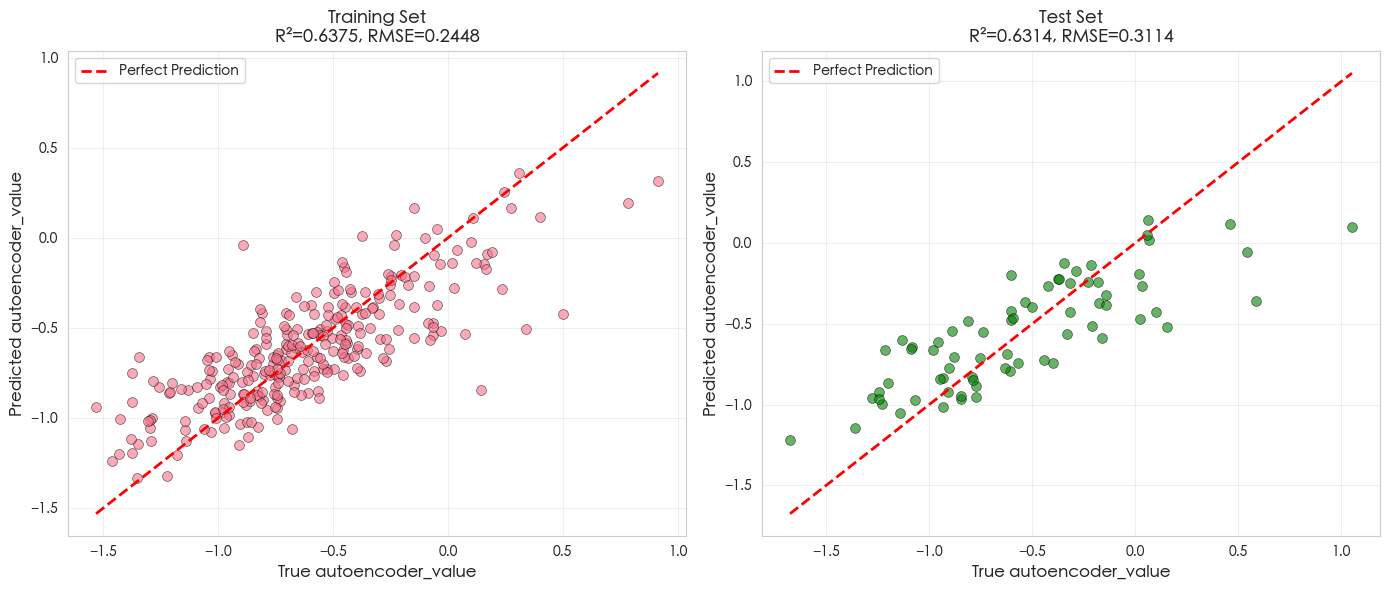

  ✓ 保存: lasso_results/2_residuals.png


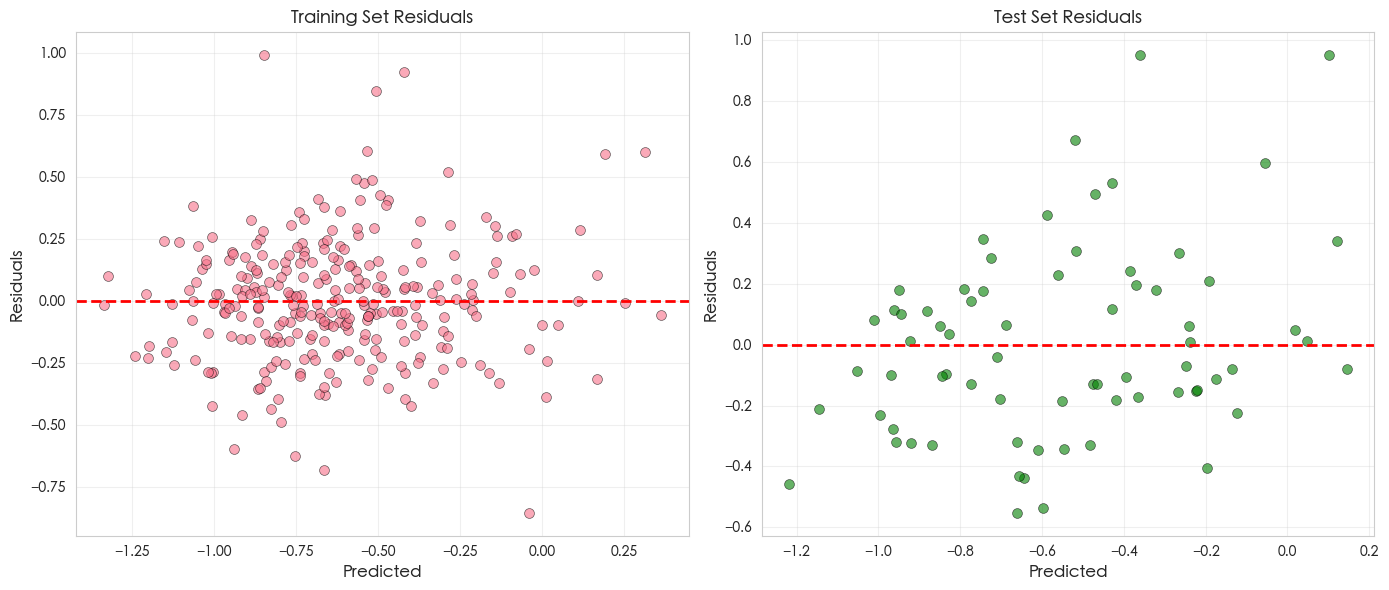

  ✓ 保存: lasso_results/3_distribution_comparison.png


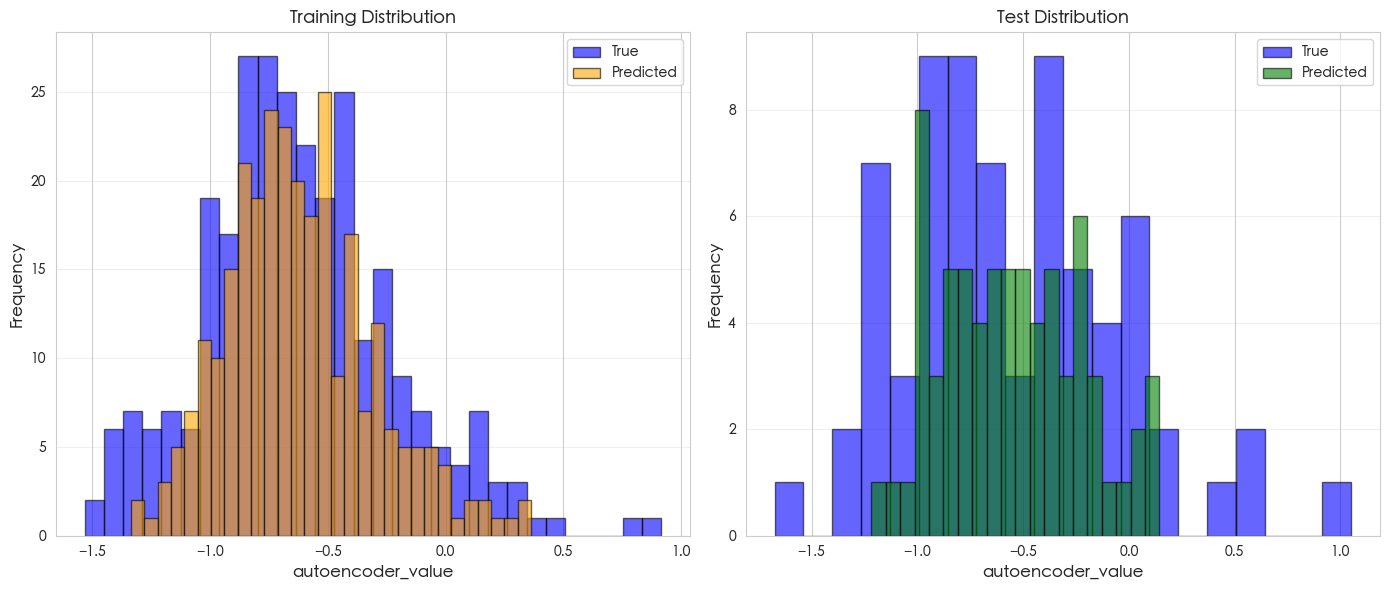

  ✓ 保存: lasso_results/4_metrics_comparison.png


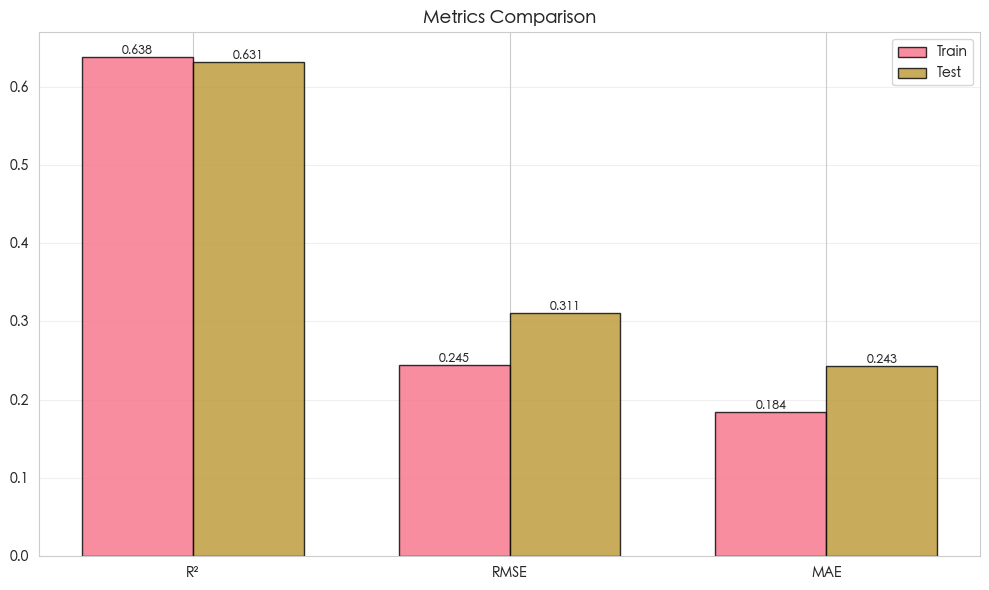

  ✓ 保存: lasso_results/5_feature_importance.png


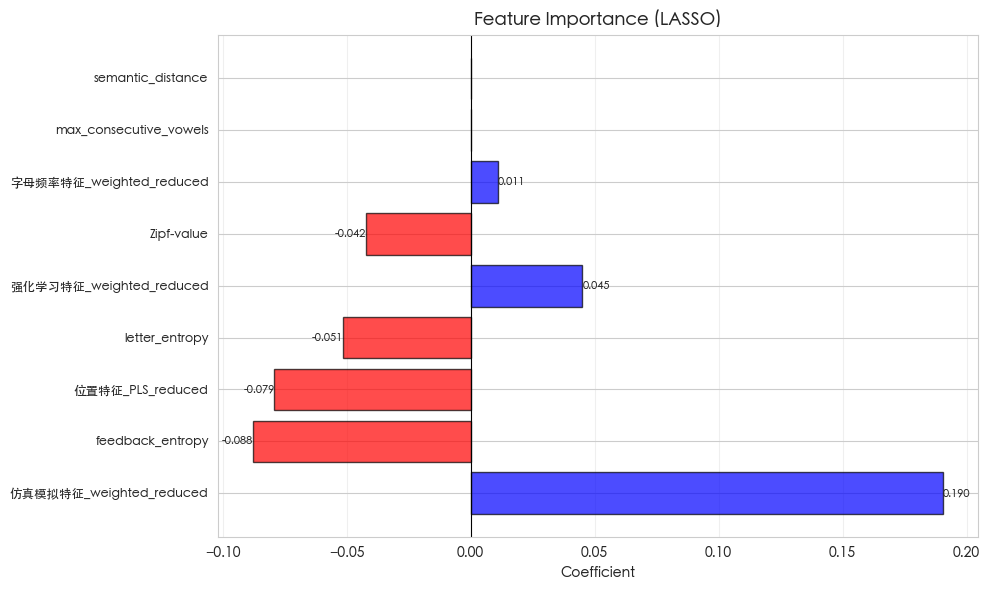

  ✓ 保存: lasso_results/6_error_distribution.png


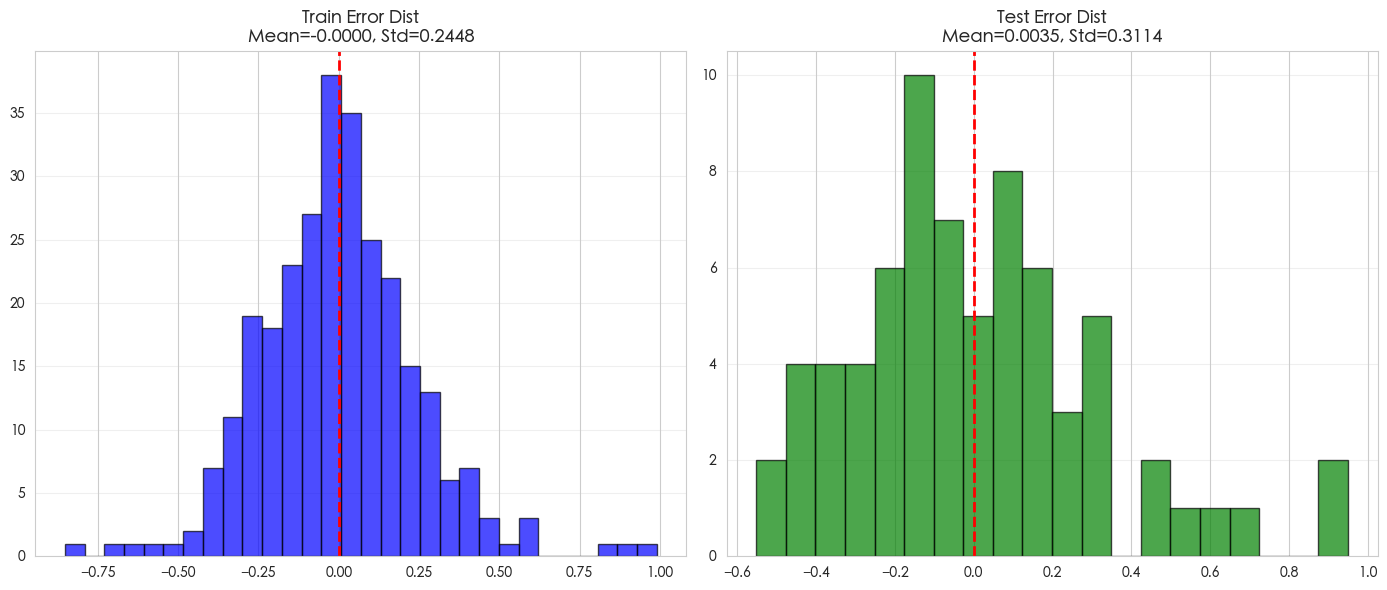

预测结果已保存到 lasso_results/
报告已保存到 lasso_results/report.txt


'======================================================================\nLASSO 回归模型 - 预测报告\n生成时间: 2025-12-15 18:06:18\n======================================================================\n\n## 最优超参数\n----------------------------------------\nlasso__alpha: 0.01\n\n交叉验证 R²: 0.6050\n\n## 训练集指标\n----------------------------------------\nR2: 0.6375\nRMSE: 0.2448\nMAE: 0.1838\n\n## 测试集指标\n----------------------------------------\nR2: 0.6314\nRMSE: 0.3114\nMAE: 0.2430\n\n## 特征重要性（按系数绝对值排序）\n----------------------------------------\n仿真模拟特征_weighted_reduced                      0.1905\nfeedback_entropy                            -0.0878\n位置特征_PLS_reduced                            -0.0791\nletter_entropy                              -0.0513\n强化学习特征_weighted_reduced                      0.0451\nZipf-value                                  -0.0422\n字母频率特征_weighted_reduced                      0.0109\nmax_consecutive_vowels                      -0.0000\nsemantic_distance                         

In [4]:
# 训练LASSO模型
lasso_results = train_and_evaluate_model(
    model_name='lasso',
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    feature_cols=feature_cols,
    output_dir='lasso_results',
    save_plots=True,
    show_plots=True
)

# 保存预测结果和报告
save_predictions(lasso_results, X_train, y_train, X_test, y_test, 'lasso_results')
generate_report(lasso_results, 'lasso_results/report.txt')

## 3. Ridge 回归模型


RIDGE 模型训练与评估
Fitting 5 folds for each of 70 candidates, totalling 350 fits

最优参数: {'ridge__alpha': 20.0, 'ridge__solver': 'sag'}
最优交叉验证R²: 0.6040

RIDGE 评估结果

训练集:
  R²  = 0.6384
  RMSE = 0.2445
  MAE  = 0.1845

测试集:
  R²  = 0.6389
  RMSE = 0.3082
  MAE  = 0.2417
  ✓ 保存: ridge_results/1_prediction_scatter.png


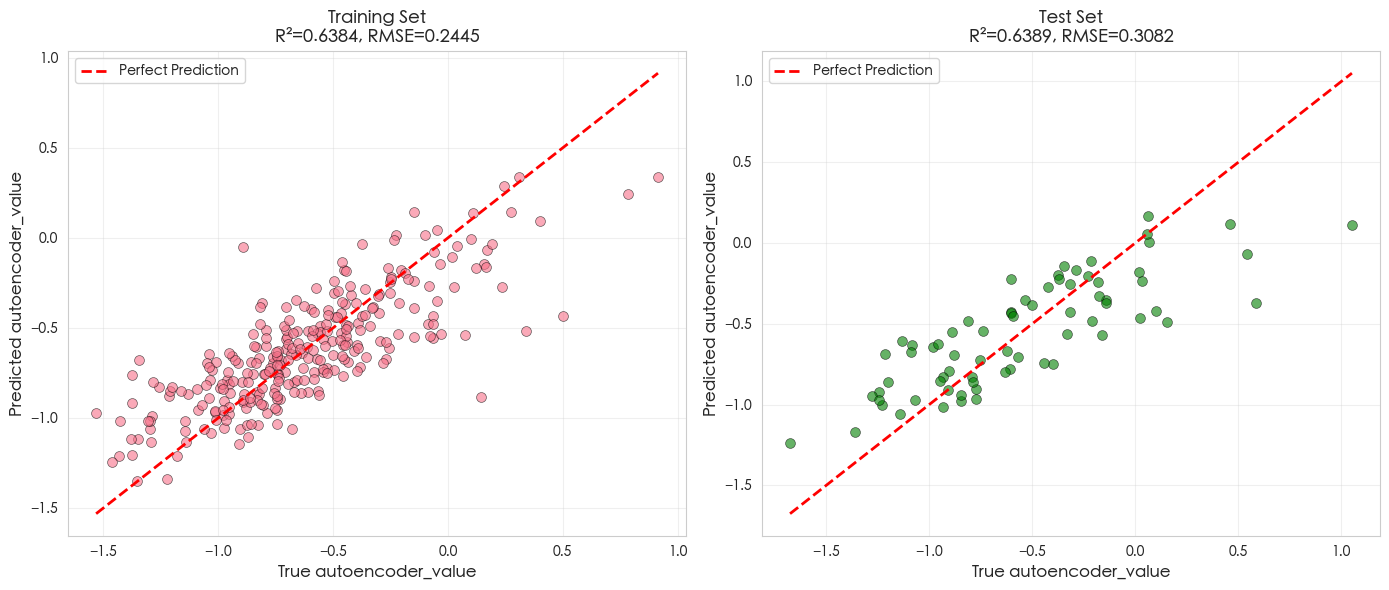

  ✓ 保存: ridge_results/2_residuals.png


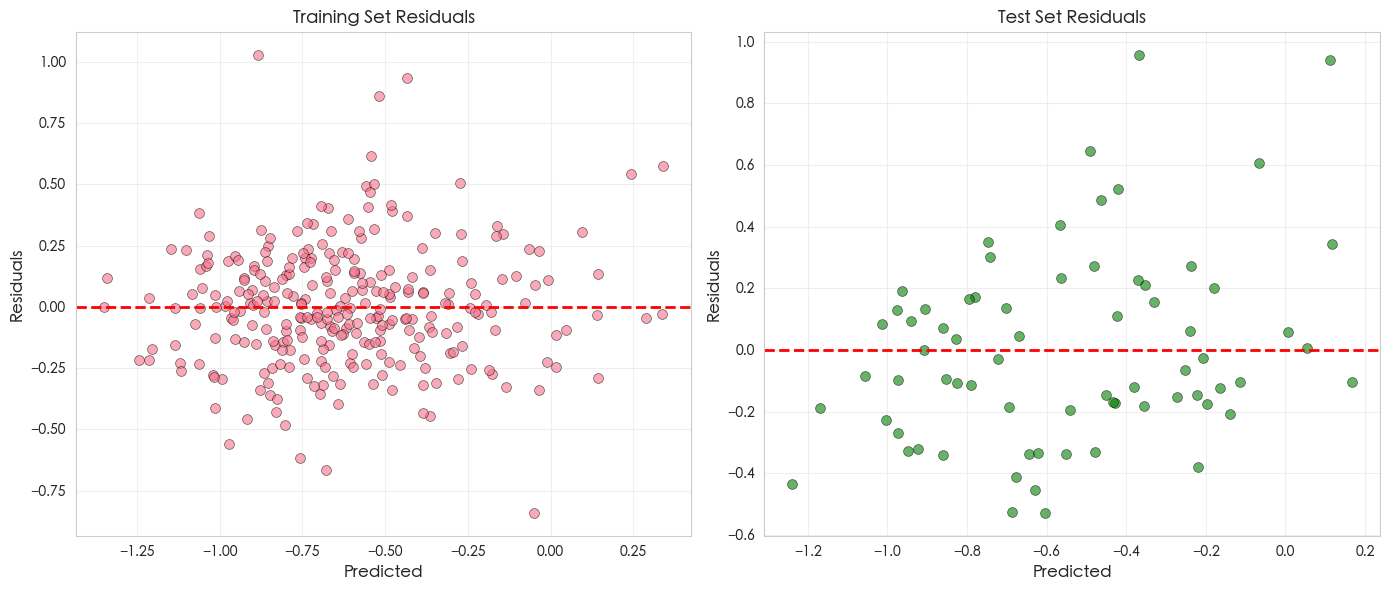

  ✓ 保存: ridge_results/3_distribution_comparison.png


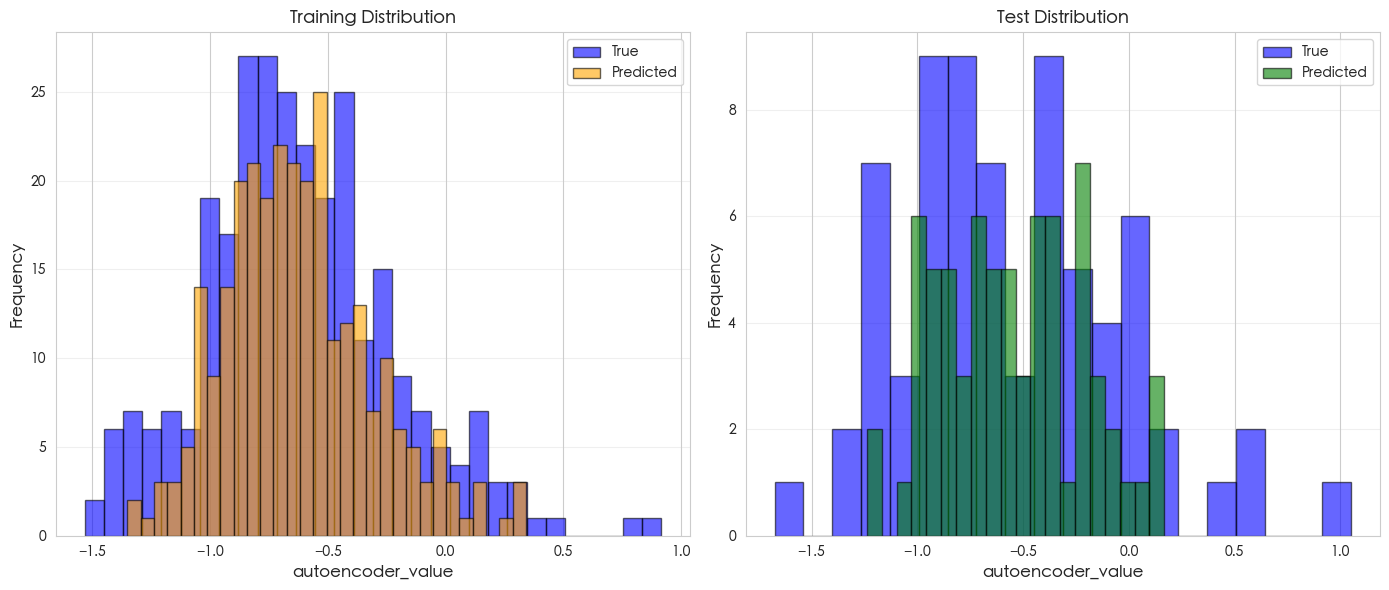

  ✓ 保存: ridge_results/4_metrics_comparison.png


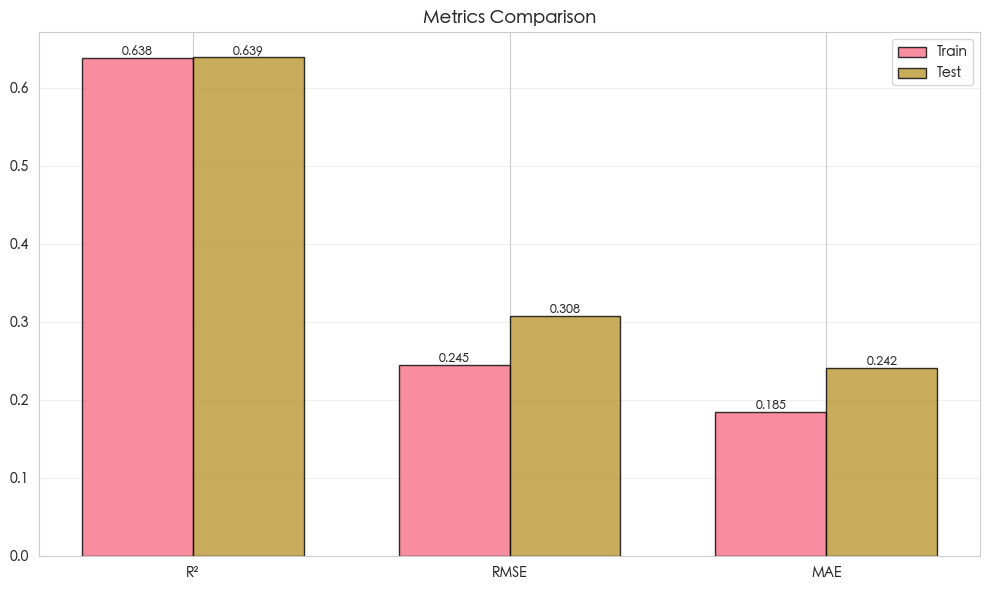

  ✓ 保存: ridge_results/5_feature_importance.png


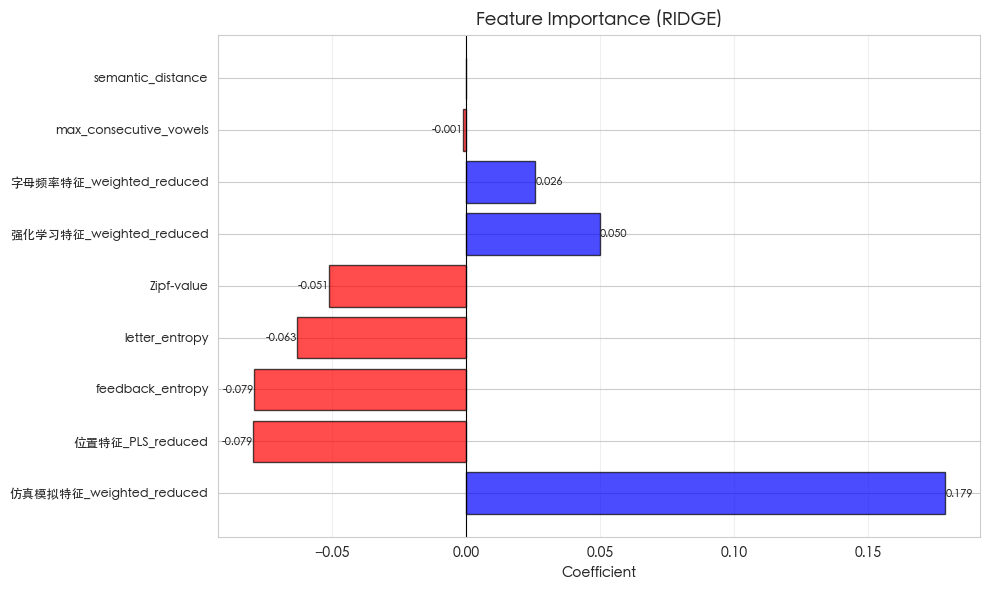

  ✓ 保存: ridge_results/6_error_distribution.png


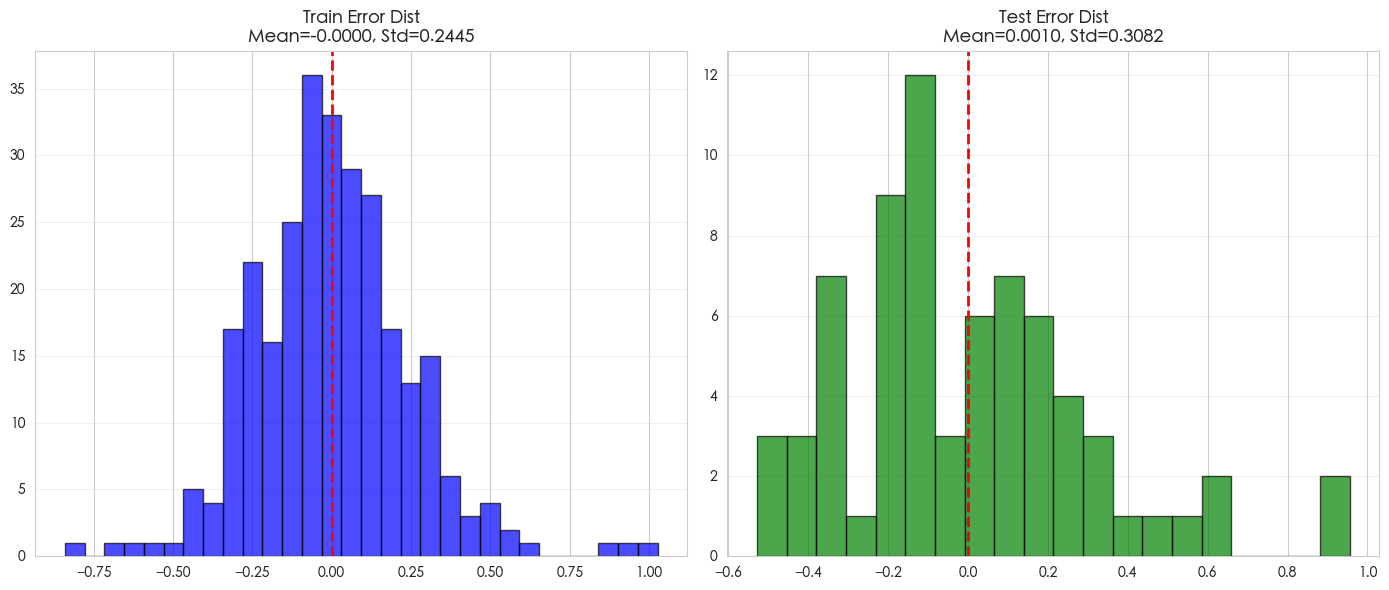

预测结果已保存到 ridge_results/
报告已保存到 ridge_results/report.txt


'======================================================================\nRIDGE 回归模型 - 预测报告\n生成时间: 2025-12-15 18:06:28\n======================================================================\n\n## 最优超参数\n----------------------------------------\nridge__alpha: 20.0\nridge__solver: sag\n\n交叉验证 R²: 0.6040\n\n## 训练集指标\n----------------------------------------\nR2: 0.6384\nRMSE: 0.2445\nMAE: 0.1845\n\n## 测试集指标\n----------------------------------------\nR2: 0.6389\nRMSE: 0.3082\nMAE: 0.2417\n\n## 特征重要性（按系数绝对值排序）\n----------------------------------------\n仿真模拟特征_weighted_reduced                      0.1789\n位置特征_PLS_reduced                            -0.0795\nfeedback_entropy                            -0.0792\nletter_entropy                              -0.0630\nZipf-value                                  -0.0511\n强化学习特征_weighted_reduced                      0.0500\n字母频率特征_weighted_reduced                      0.0259\nmax_consecutive_vowels                      -0.0010\nsemantic_distance     

In [5]:
# 训练Ridge模型
ridge_results = train_and_evaluate_model(
    model_name='ridge',
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    feature_cols=feature_cols,
    output_dir='ridge_results',
    save_plots=True,
    show_plots=True
)

# 保存预测结果和报告
save_predictions(ridge_results, X_train, y_train, X_test, y_test, 'ridge_results')
generate_report(ridge_results, 'ridge_results/report.txt')

## 4. Elastic Net 回归模型


ELASTICNET 模型训练与评估
Fitting 5 folds for each of 40 candidates, totalling 200 fits

最优参数: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.1}
最优交叉验证R²: 0.6051

被L1正则化压缩为零的特征数量: 1/9

ELASTICNET 评估结果

训练集:
  R²  = 0.6332
  RMSE = 0.2463
  MAE  = 0.1850

测试集:
  R²  = 0.6225
  RMSE = 0.3151
  MAE  = 0.2441
  ✓ 保存: elasticNet_results/1_prediction_scatter.png


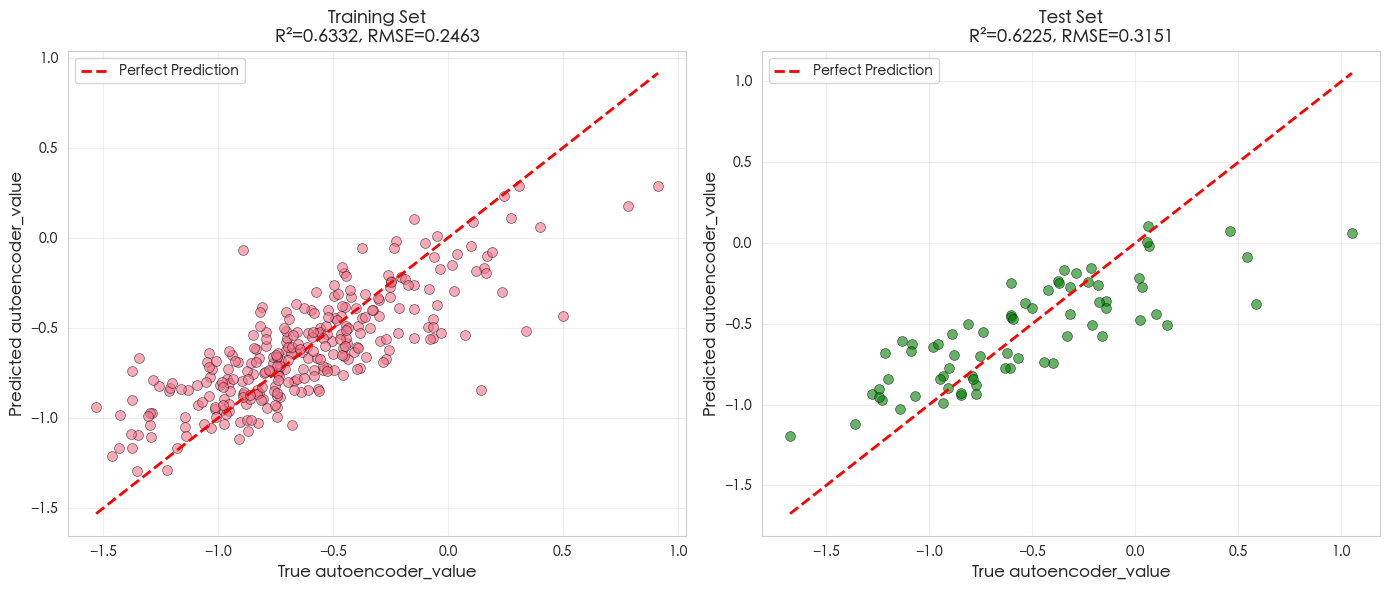

  ✓ 保存: elasticNet_results/2_residuals.png


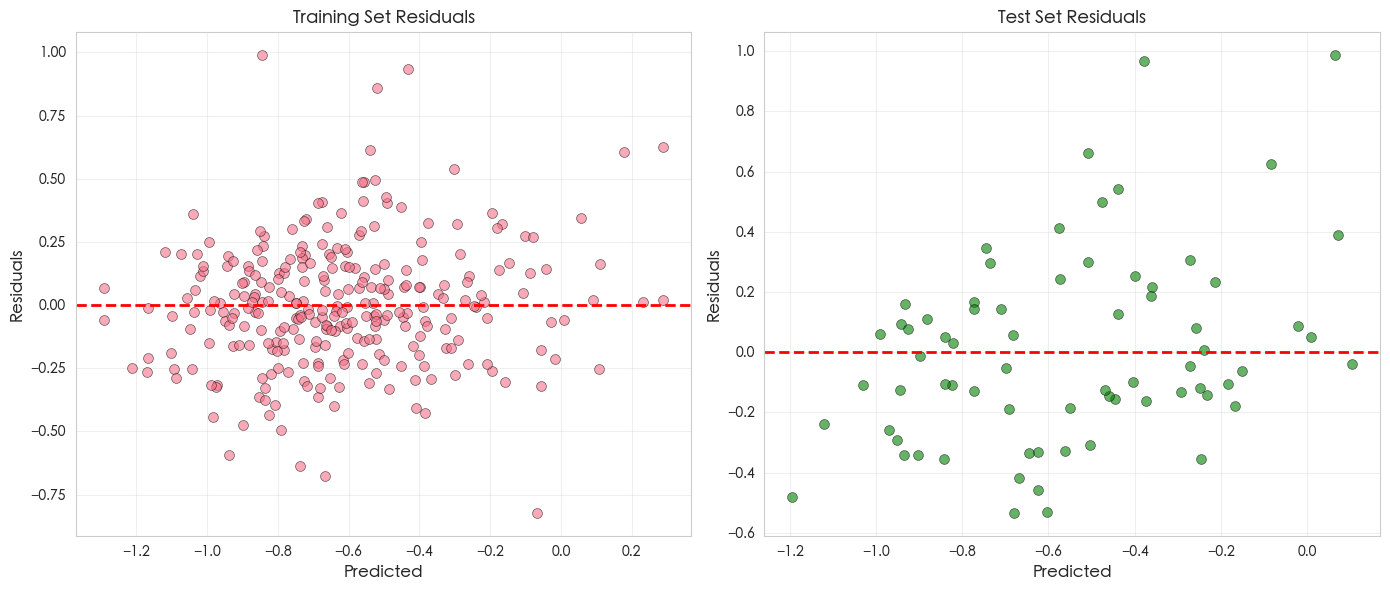

  ✓ 保存: elasticNet_results/3_distribution_comparison.png


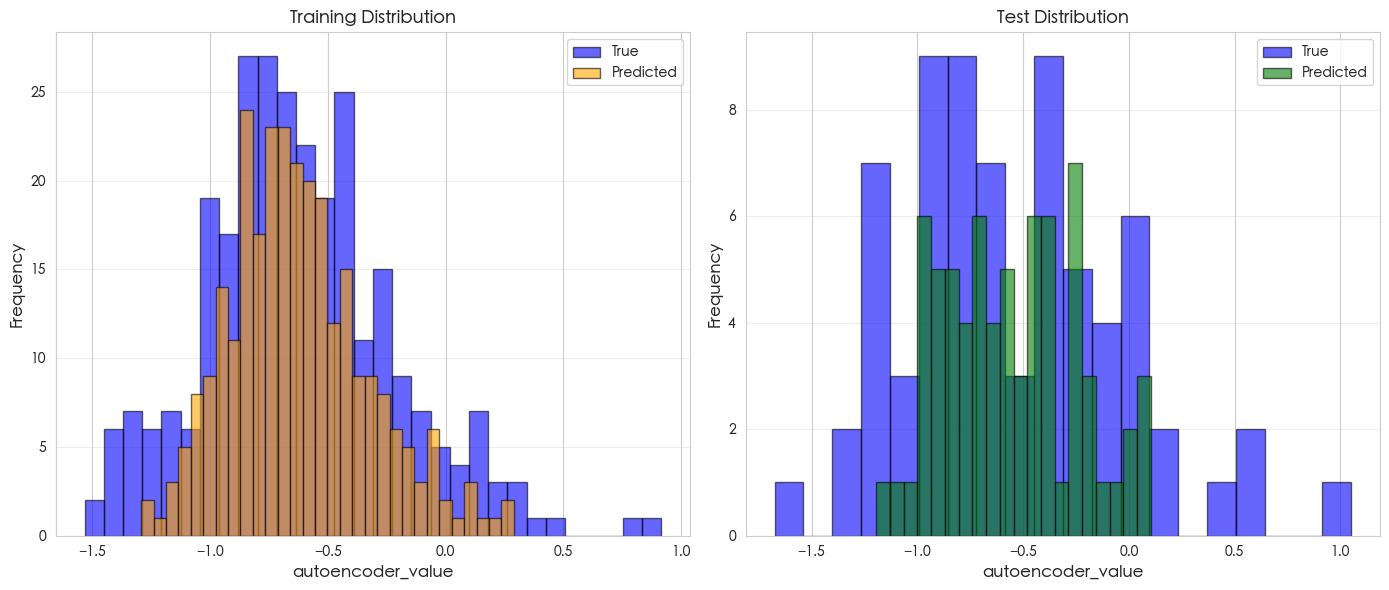

  ✓ 保存: elasticNet_results/4_metrics_comparison.png


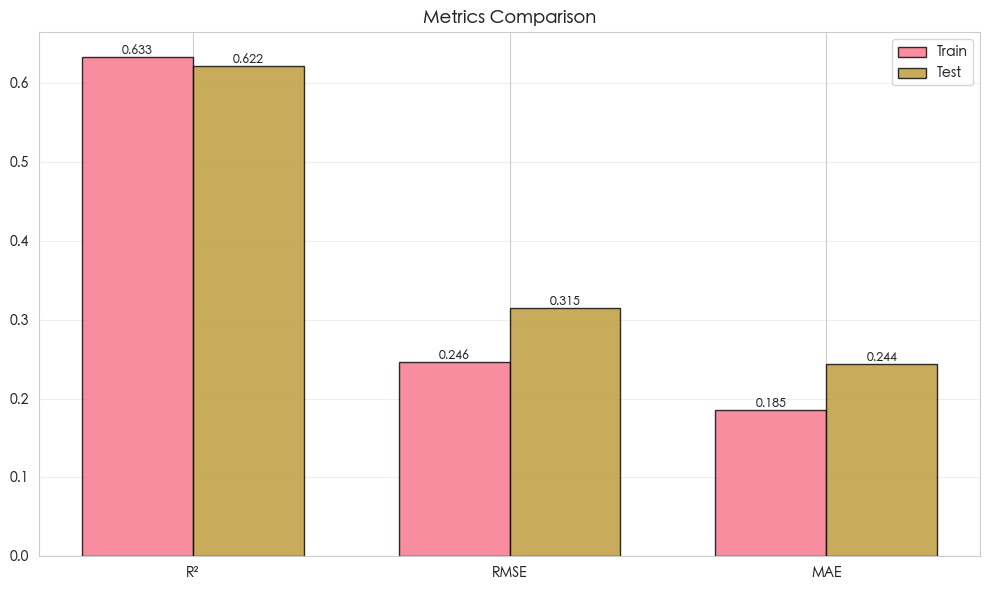

  ✓ 保存: elasticNet_results/5_feature_importance.png


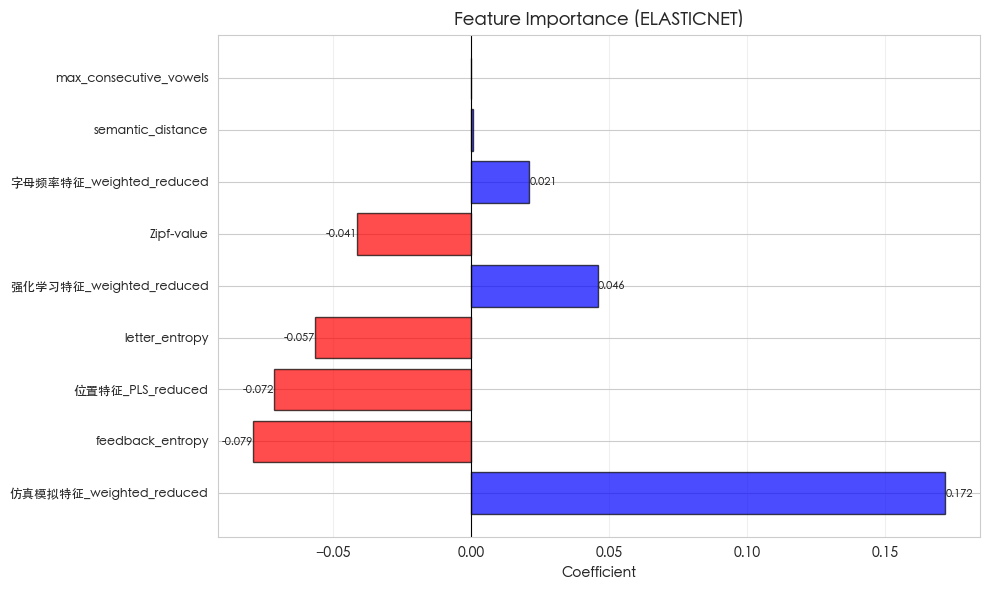

  ✓ 保存: elasticNet_results/6_error_distribution.png


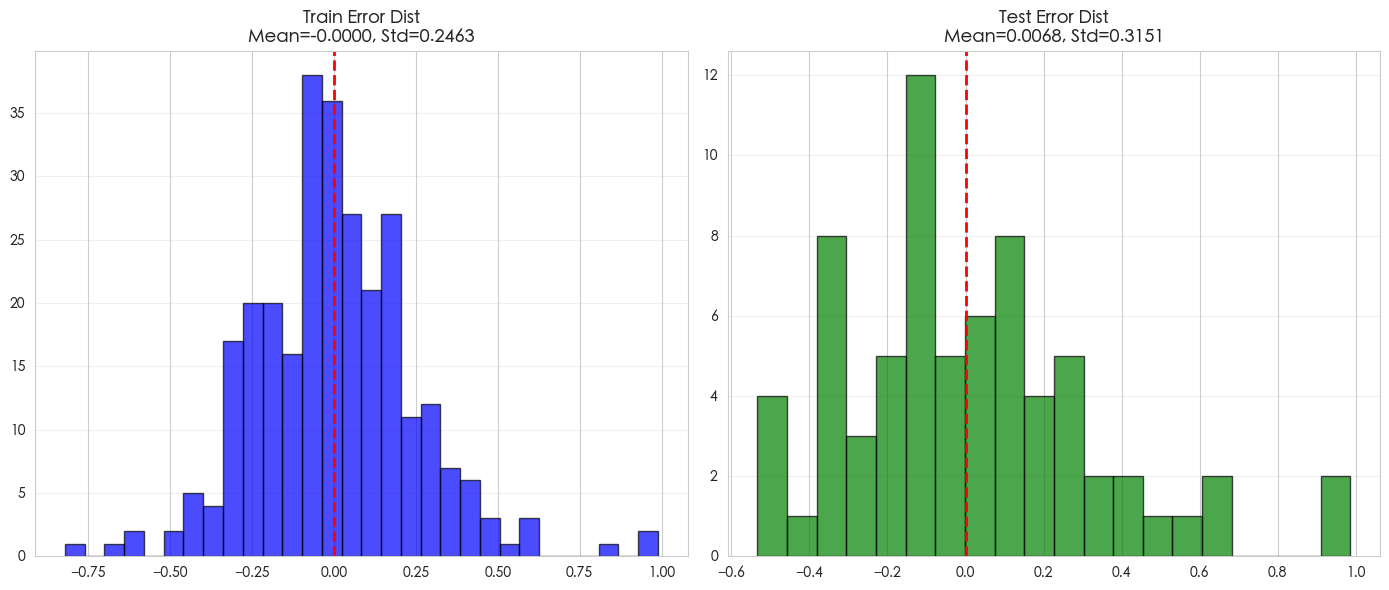

预测结果已保存到 elasticNet_results/
报告已保存到 elasticNet_results/report.txt


'======================================================================\nELASTICNET 回归模型 - 预测报告\n生成时间: 2025-12-15 18:06:41\n======================================================================\n\n## 最优超参数\n----------------------------------------\nelasticnet__alpha: 0.1\nelasticnet__l1_ratio: 0.1\n\n交叉验证 R²: 0.6051\n\n## 训练集指标\n----------------------------------------\nR2: 0.6332\nRMSE: 0.2463\nMAE: 0.1850\n\n## 测试集指标\n----------------------------------------\nR2: 0.6225\nRMSE: 0.3151\nMAE: 0.2441\n\n## 特征重要性（按系数绝对值排序）\n----------------------------------------\n仿真模拟特征_weighted_reduced                      0.1718\nfeedback_entropy                            -0.0792\n位置特征_PLS_reduced                            -0.0715\nletter_entropy                              -0.0568\n强化学习特征_weighted_reduced                      0.0459\nZipf-value                                  -0.0414\n字母频率特征_weighted_reduced                      0.0210\nsemantic_distance                            0.0006\nmax_co

In [6]:
# 训练Elastic Net模型
elasticnet_results = train_and_evaluate_model(
    model_name='elasticnet',
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    feature_cols=feature_cols,
    output_dir='elasticNet_results',
    save_plots=True,
    show_plots=True
)

# 保存预测结果和报告
save_predictions(elasticnet_results, X_train, y_train, X_test, y_test, 'elasticNet_results')
generate_report(elasticnet_results, 'elasticNet_results/report.txt')

## 5. Random Forest回归模型


RANDOMFOREST 模型训练与评估
（Random Forest训练可能需要几分钟，请耐心等待...）
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

最优参数: {'rf__max_depth': 10, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 300}
最优交叉验证R²: 0.5715

RANDOMFOREST 评估结果

训练集:
  R²  = 0.8947
  RMSE = 0.1320
  MAE  = 0.1015

测试集:
  R²  = 0.5843
  RMSE = 0.3307
  MAE  = 0.2404
  ✓ 保存: ../randomForest_results/1_prediction_scatter.png


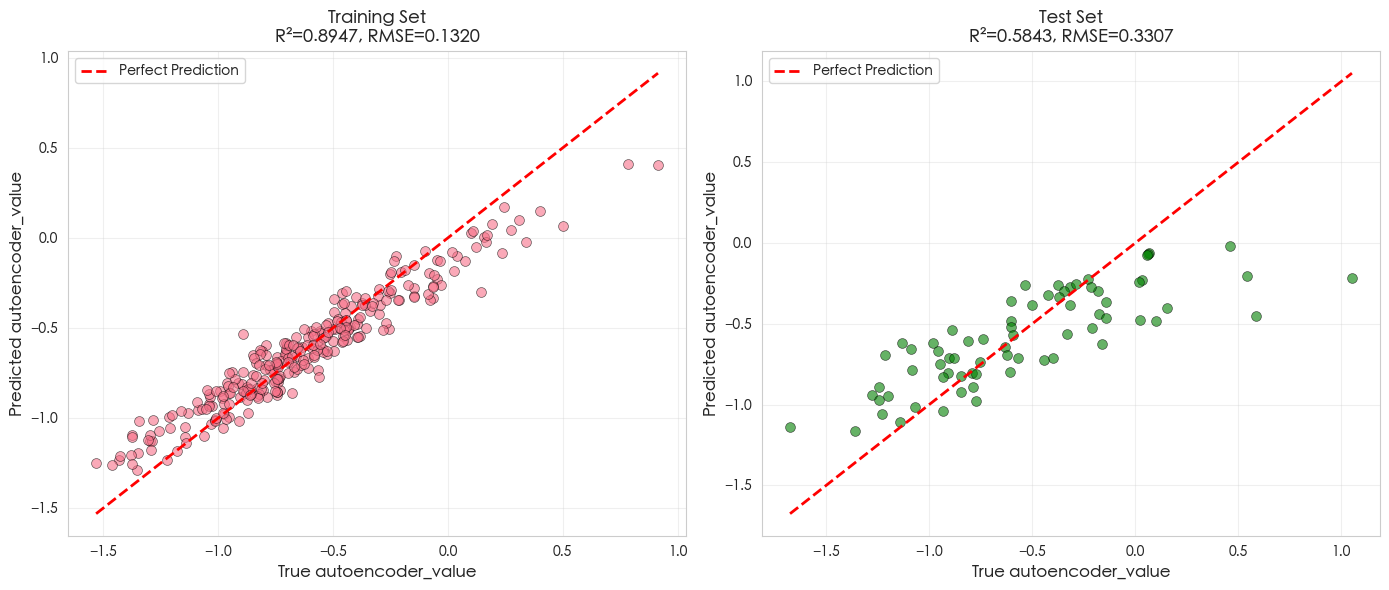

  ✓ 保存: ../randomForest_results/2_residuals.png


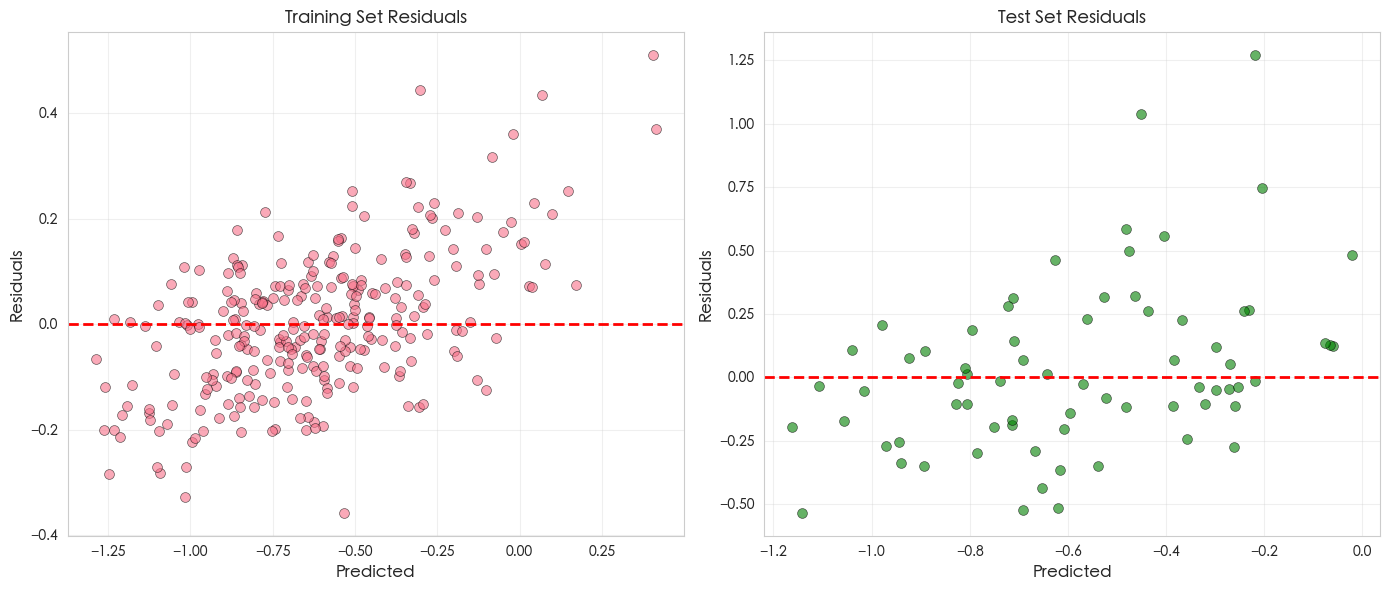

  ✓ 保存: ../randomForest_results/3_distribution_comparison.png


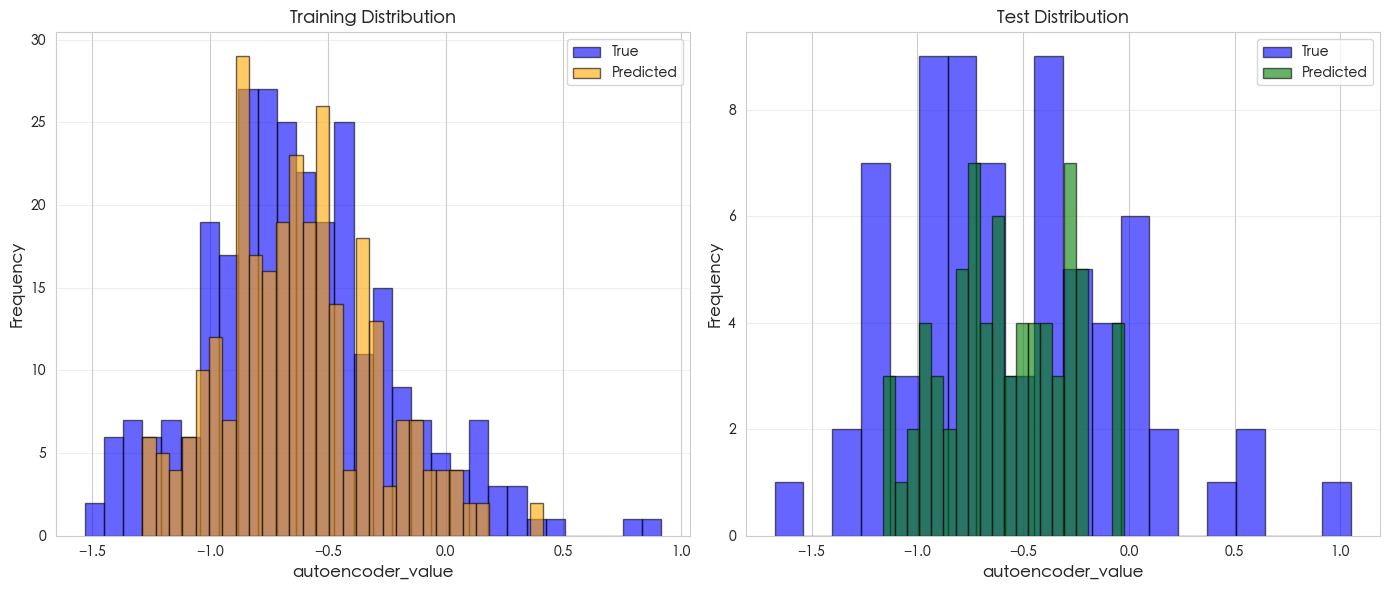

  ✓ 保存: ../randomForest_results/4_metrics_comparison.png


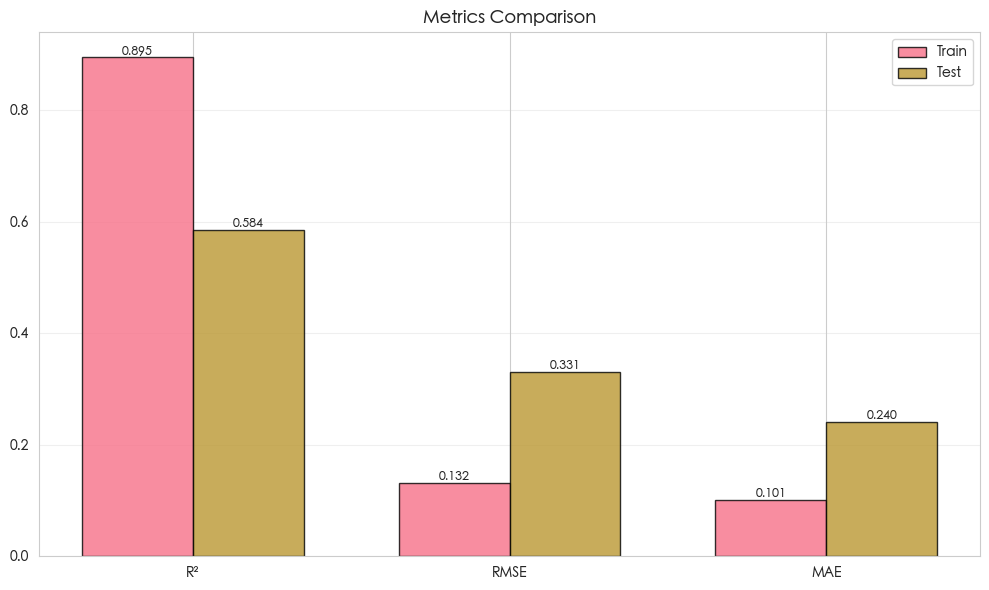

  ✓ 保存: ../randomForest_results/5_feature_importance.png


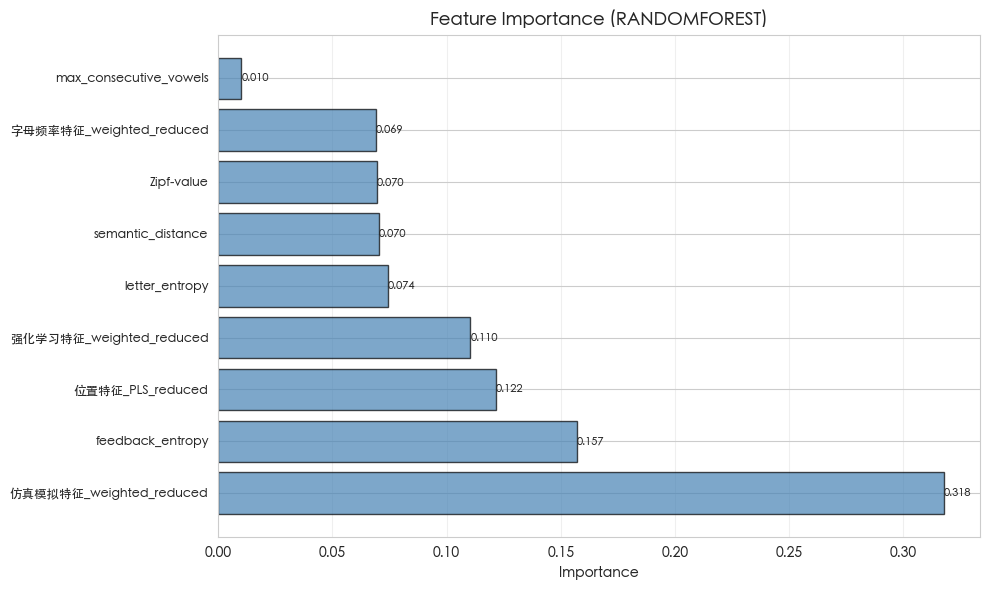

  ✓ 保存: ../randomForest_results/6_error_distribution.png


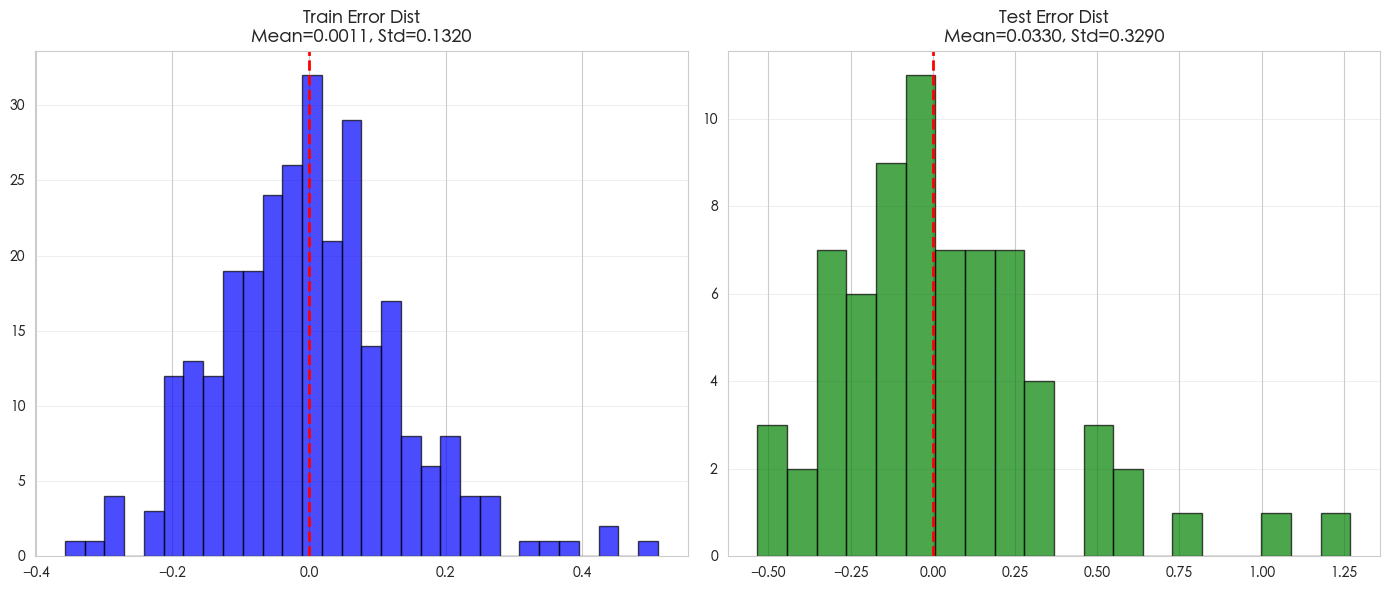

预测结果已保存到 ../randomForest_results/
报告已保存到 ../randomForest_results/report.txt


'======================================================================\nRANDOMFOREST 回归模型 - 预测报告\n生成时间: 2025-12-15 18:10:00\n======================================================================\n\n## 最优超参数\n----------------------------------------\nrf__max_depth: 10\nrf__max_features: log2\nrf__min_samples_leaf: 1\nrf__min_samples_split: 5\nrf__n_estimators: 300\n\n交叉验证 R²: 0.5715\n\n## 训练集指标\n----------------------------------------\nR2: 0.8947\nRMSE: 0.1320\nMAE: 0.1015\n\n## 测试集指标\n----------------------------------------\nR2: 0.5843\nRMSE: 0.3307\nMAE: 0.2404\n\n## 特征重要性（按重要性排序）\n----------------------------------------\n仿真模拟特征_weighted_reduced                      0.3178\nfeedback_entropy                             0.1569\n位置特征_PLS_reduced                             0.1215\n强化学习特征_weighted_reduced                      0.1104\nletter_entropy                               0.0744\nsemantic_distance                            0.0704\nZipf-value                                   0

In [8]:
# 训练 Random Forest 模型
randomforest_results = train_and_evaluate_model(
    'randomforest',
    X_train, y_train, X_test, y_test,
    feature_cols=feature_cols,
    output_dir='../randomForest_results',
    save_plots=True,
    show_plots=True,
    param_grid={
        'rf__n_estimators': [100, 200, 300],
        'rf__max_depth': [10, 20, 30, None],
        'rf__min_samples_split': [2, 5, 10],
        'rf__min_samples_leaf': [1, 2, 4],
        'rf__max_features': ['sqrt', 'log2']
    },
    cv_splits=5,
    verbose=1
)

# 保存预测结果和报告
save_predictions(randomforest_results, X_train, y_train, X_test, y_test, '../randomForest_results')
generate_report(randomforest_results, '../randomForest_results/report.txt')

## MLP回归模型


MLP 模型训练与评估
（MLP训练可能需要几分钟时间，请耐心等待...）
Fitting 5 folds for each of 72 candidates, totalling 360 fits

最优参数: {'mlp__activation': 'tanh', 'mlp__alpha': 0.01, 'mlp__hidden_layer_sizes': (64, 32), 'mlp__learning_rate_init': 0.0001}
最优交叉验证R²: 0.5227

MLP 评估结果

训练集:
  R²  = 0.5801
  RMSE = 0.2635
  MAE  = 0.2029

测试集:
  R²  = 0.5533
  RMSE = 0.3428
  MAE  = 0.2620
  ✓ 保存: mlp_results/1_prediction_scatter.png


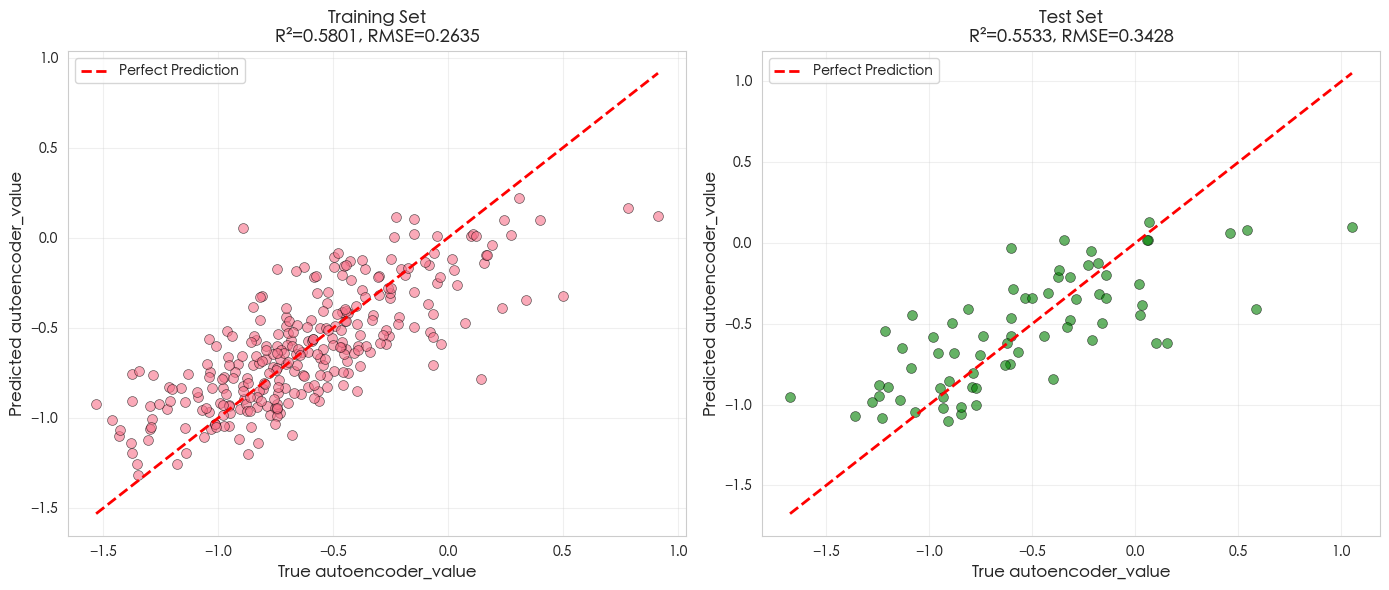

  ✓ 保存: mlp_results/2_residuals.png


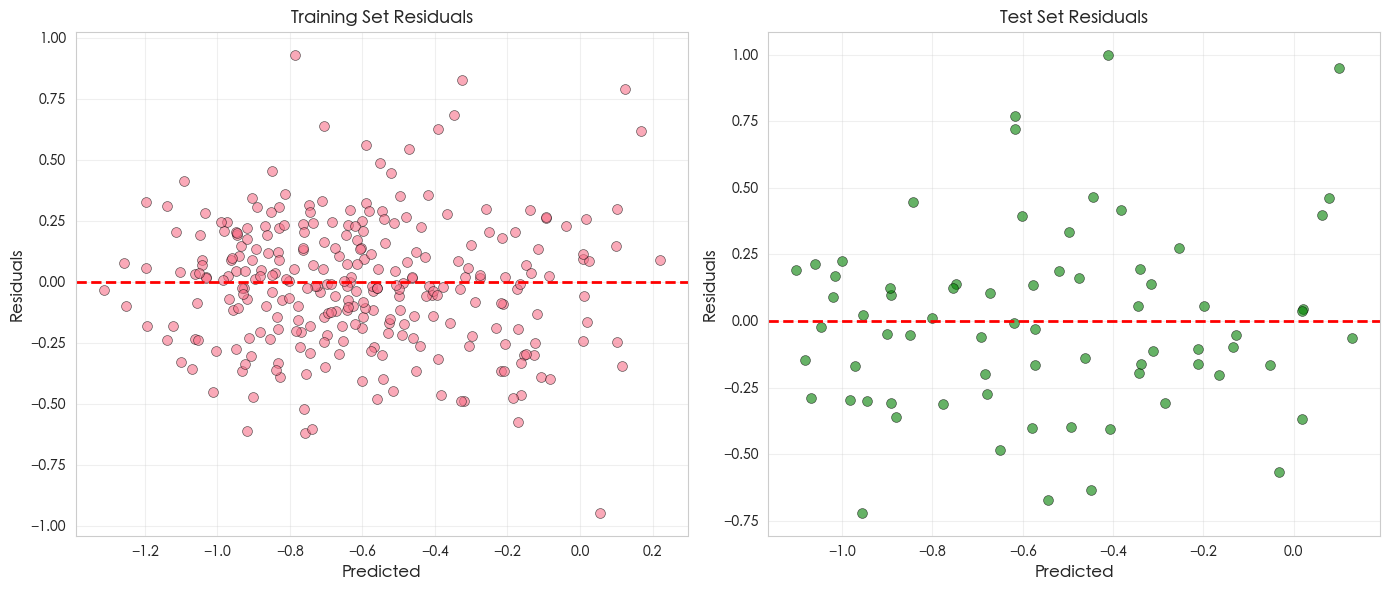

  ✓ 保存: mlp_results/3_distribution_comparison.png


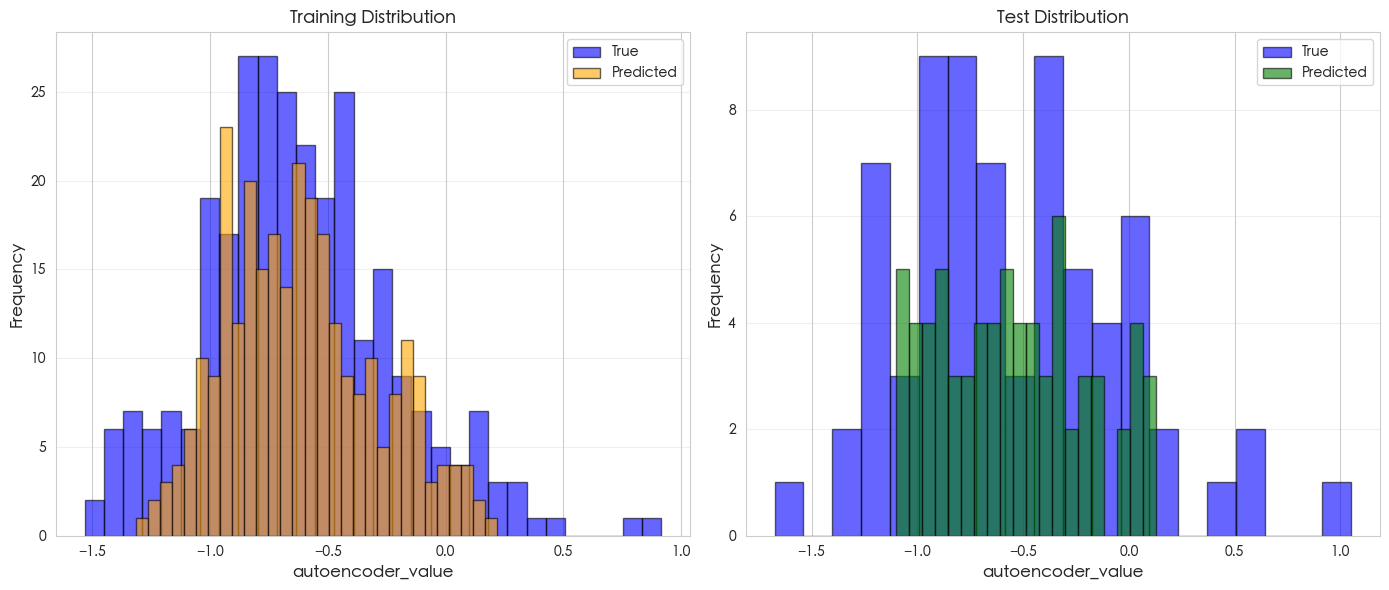

  ✓ 保存: mlp_results/4_metrics_comparison.png


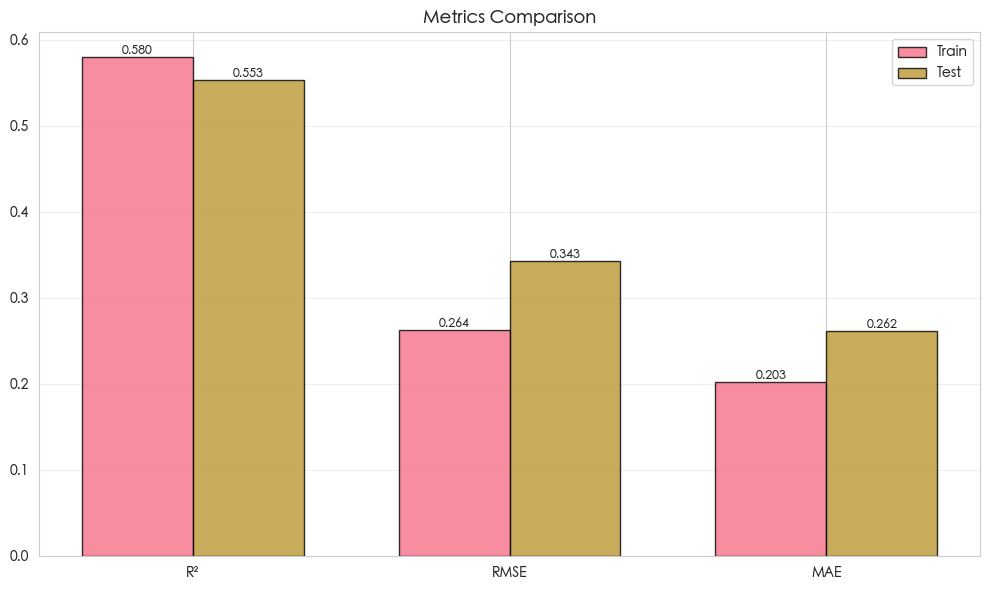

  ✓ 保存: mlp_results/6_error_distribution.png


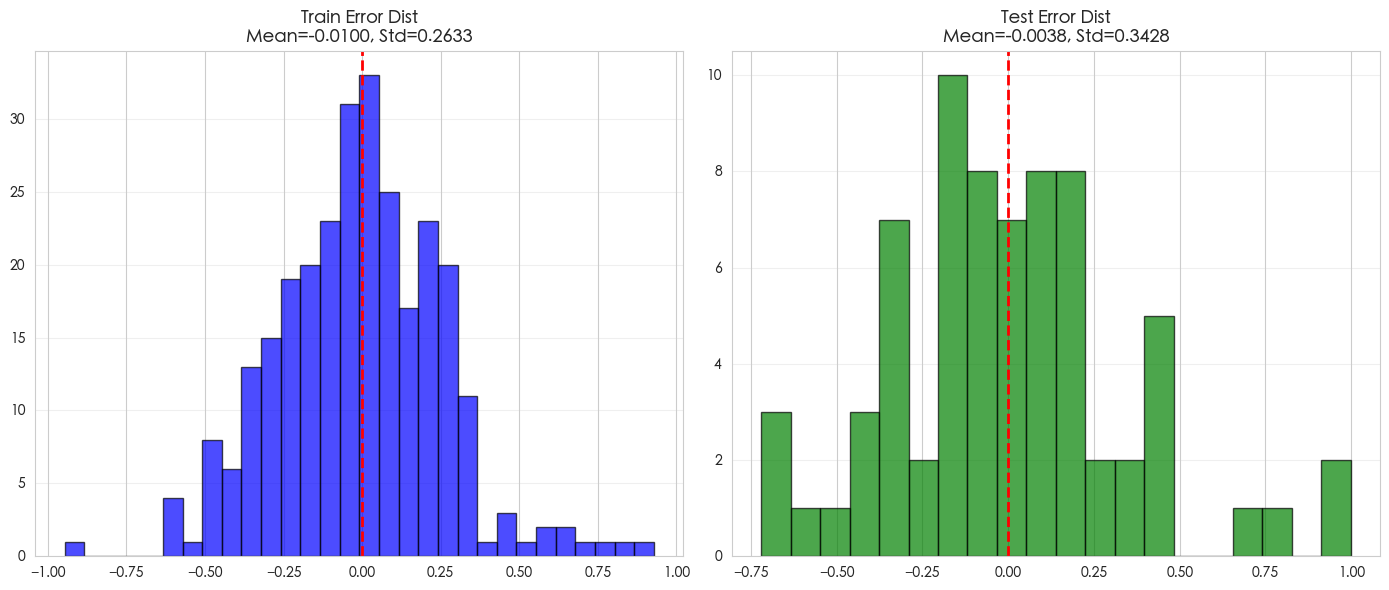

预测结果已保存到 mlp_results/
报告已保存到 mlp_results/report.txt


'======================================================================\nMLP 回归模型 - 预测报告\n生成时间: 2025-12-15 18:10:08\n======================================================================\n\n## 最优超参数\n----------------------------------------\nmlp__activation: tanh\nmlp__alpha: 0.01\nmlp__hidden_layer_sizes: (64, 32)\nmlp__learning_rate_init: 0.0001\n\n交叉验证 R²: 0.5227\n\n## 训练集指标\n----------------------------------------\nR2: 0.5801\nRMSE: 0.2635\nMAE: 0.2029\n\n## 测试集指标\n----------------------------------------\nR2: 0.5533\nRMSE: 0.3428\nMAE: 0.2620\n\n======================================================================\n报告结束\n======================================================================'

In [9]:
# 训练MLP模型（可能需要几分钟）
mlp_results = train_and_evaluate_model(
    model_name='mlp',
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    feature_cols=feature_cols,
    output_dir='mlp_results',
    save_plots=True,
    show_plots=True
)

# 保存预测结果和报告
save_predictions(mlp_results, X_train, y_train, X_test, y_test, 'mlp_results')
generate_report(mlp_results, 'mlp_results/report.txt')

## 6. TabNet 回归模型

> 注意: TabNet需要安装 `pytorch-tabnet` 包：`pip install pytorch-tabnet`

In [11]:
# 加载TabNet数据（使用更多特征）
X_tabnet, y_tabnet, tabnet_feature_names = load_tabnet_data(
    data_path="../data/mcm_processed_data.csv"
)

# 预处理
X_tabnet_np, y_tabnet_np = preprocess_tabnet_data(X_tabnet, y_tabnet)

数据集加载: 358 行, 92 列
使用 55 个特征
特征矩阵形状: (358, 55)
目标向量形状: (358, 1)



使用 5 折交叉验证训练TabNet

--- Fold 1/5 ---

Early stopping occurred at epoch 277 with best_epoch = 177 and best_val_0_rmse = 0.23175
  RMSE: 0.4060, MAE: 0.3117, R²: 0.3689

--- Fold 2/5 ---

Early stopping occurred at epoch 262 with best_epoch = 162 and best_val_0_rmse = 0.352
  RMSE: 0.3031, MAE: 0.2493, R²: 0.4217

--- Fold 3/5 ---

Early stopping occurred at epoch 315 with best_epoch = 215 and best_val_0_rmse = 0.32836
  RMSE: 0.3263, MAE: 0.2293, R²: 0.4696

--- Fold 4/5 ---

Early stopping occurred at epoch 205 with best_epoch = 105 and best_val_0_rmse = 0.27685
  RMSE: 0.2902, MAE: 0.2298, R²: 0.4685

--- Fold 5/5 ---

Early stopping occurred at epoch 368 with best_epoch = 268 and best_val_0_rmse = 0.30399
  RMSE: 0.4636, MAE: 0.2803, R²: 0.1626

交叉验证汇总
RMSE: 0.3578 ± 0.0664
MAE:  0.2601 ± 0.0318
R²:   0.3782 ± 0.1140
  ✓ 保存: output/tabnet_cv_fold_metrics.png


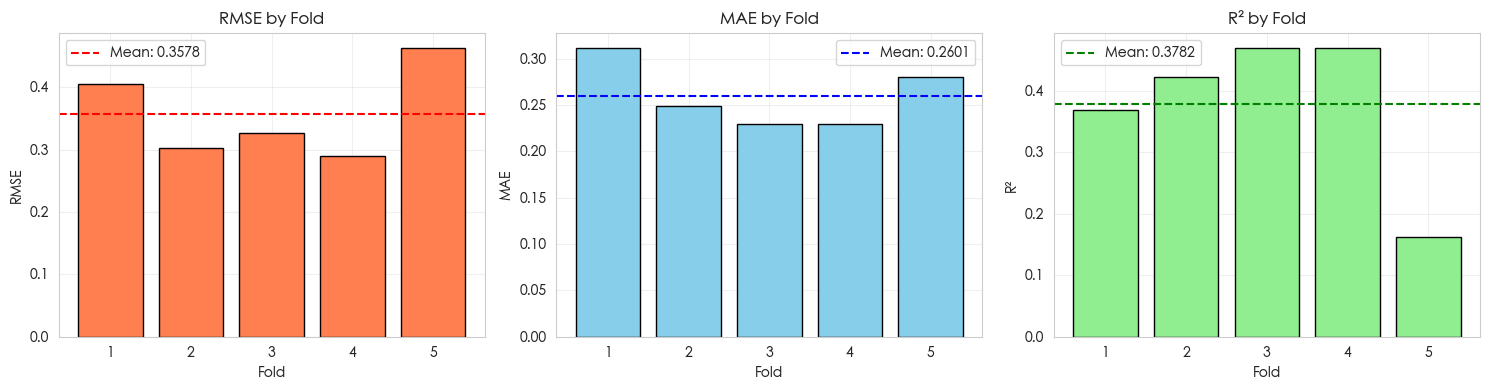

  ✓ 保存: output/tabnet_feature_importance.png


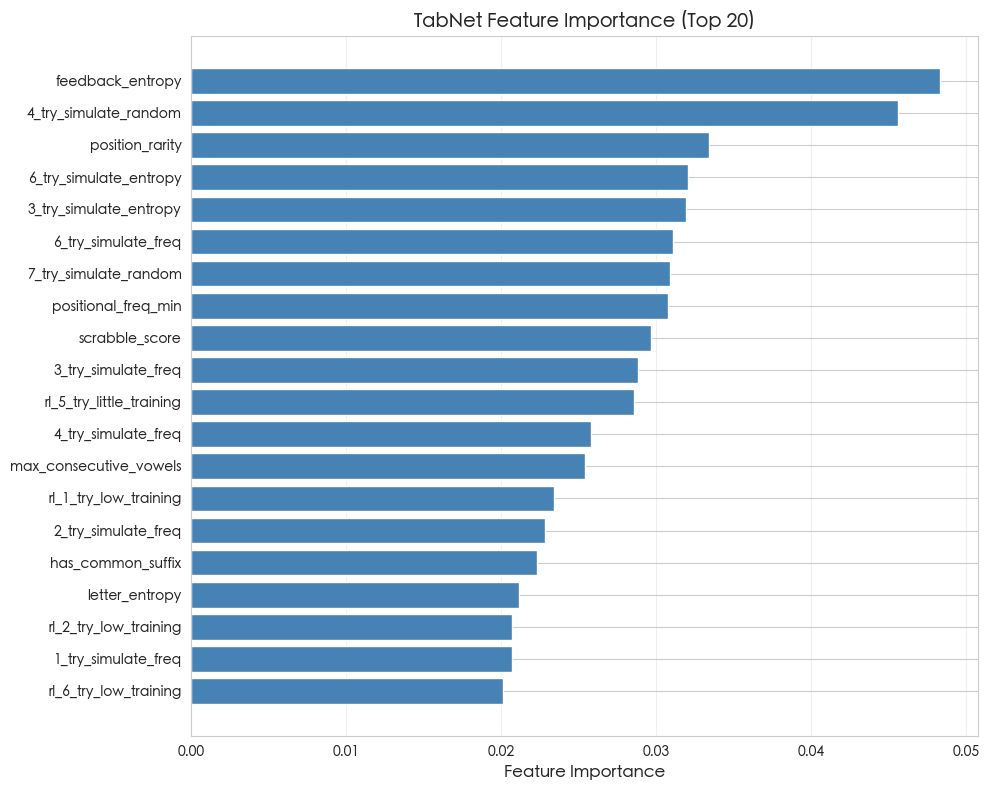

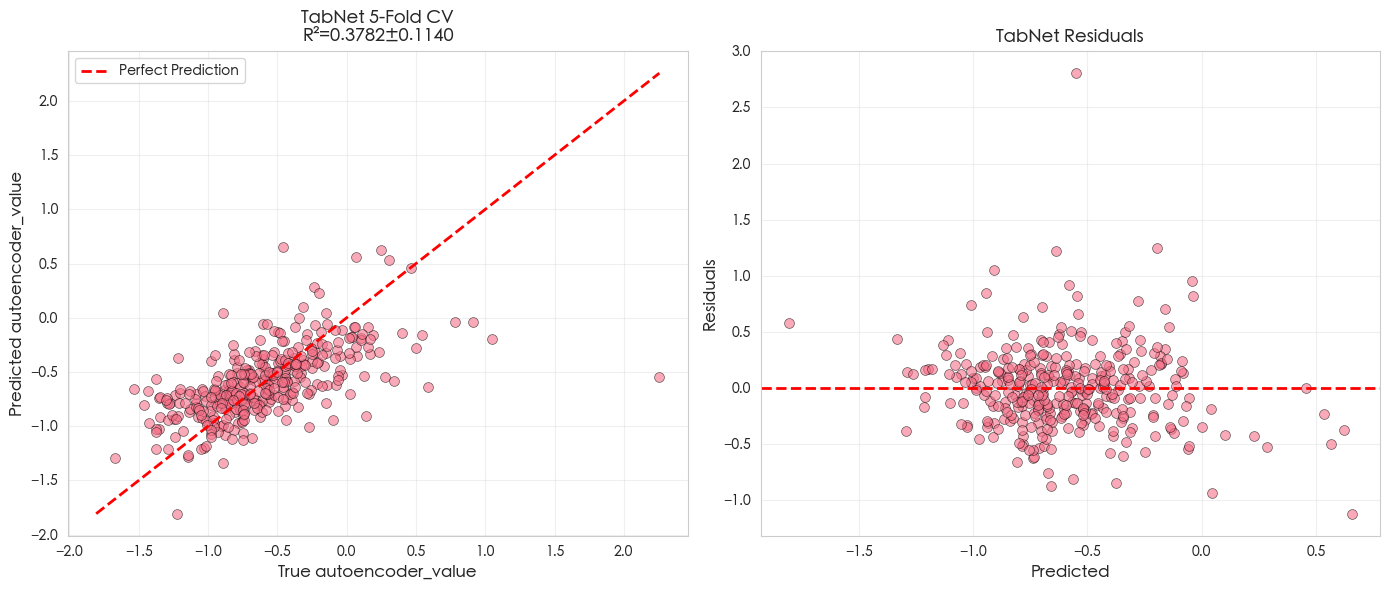


TabNet CV Summary:
  R²:   0.3782 ± 0.1140
  RMSE: 0.3578 ± 0.0664
  MAE:  0.2601 ± 0.0318


In [12]:
# 使用交叉验证训练TabNet
import os
os.makedirs('output', exist_ok=True)

y_test_cv, y_pred_cv, fold_metrics, feature_importance, cv_summary = train_tabnet_cv(
    X_tabnet_np, y_tabnet_np, n_splits=5
)

# 绘制交叉验证各折指标
plot_cv_fold_metrics(fold_metrics, save_path='output/tabnet_cv_fold_metrics.png')

# 绘制特征重要性
plot_tabnet_feature_importance(
    tabnet_feature_names, 
    feature_importance, 
    top_n=20,
    save_path='output/tabnet_feature_importance.png'
)

# 绘制预测散点图
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 预测 vs 真实
axes[0].scatter(y_test_cv, y_pred_cv, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
mn, mx = min(y_test_cv.min(), y_pred_cv.min()), max(y_test_cv.max(), y_pred_cv.max())
axes[0].plot([mn, mx], [mn, mx], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('True autoencoder_value', fontsize=12)
axes[0].set_ylabel('Predicted autoencoder_value', fontsize=12)
axes[0].set_title(f"TabNet 5-Fold CV\nR²={cv_summary['r2_mean']:.4f}±{cv_summary['r2_std']:.4f}", 
                  fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 残差
residuals = y_test_cv - y_pred_cv
axes[1].scatter(y_pred_cv, residuals, alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[1].axhline(0, color='r', ls='--', lw=2)
axes[1].set_xlabel('Predicted', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('TabNet Residuals', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('output/tabnet_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nTabNet CV Summary:")
print(f"  R²:   {cv_summary['r2_mean']:.4f} ± {cv_summary['r2_std']:.4f}")
print(f"  RMSE: {cv_summary['rmse_mean']:.4f} ± {cv_summary['rmse_std']:.4f}")
print(f"  MAE:  {cv_summary['mae_mean']:.4f} ± {cv_summary['mae_std']:.4f}")

## 7. 模型对比

  ✓ 保存: output/models_comparison.png


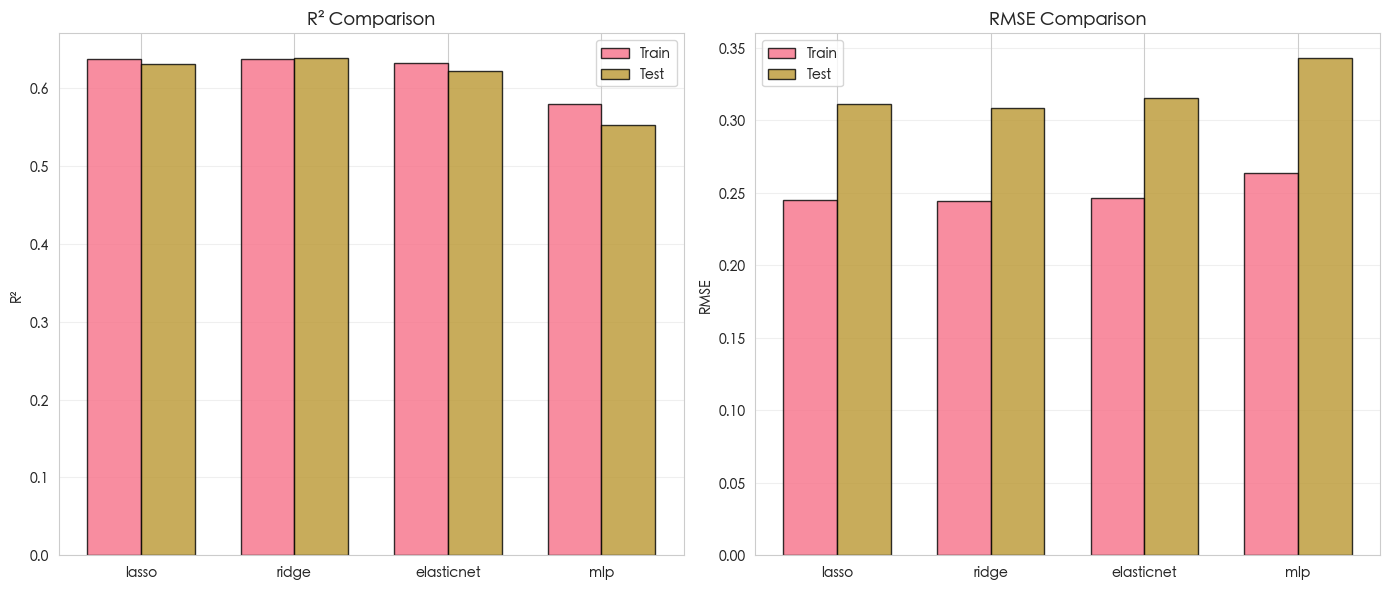


模型性能汇总
Model           Train R²     Test R²      Train RMSE   Test RMSE   
----------------------------------------------------------------------
lasso           0.6375       0.6314       0.2448       0.3114      
ridge           0.6384       0.6389       0.2445       0.3082      
elasticnet      0.6332       0.6225       0.2463       0.3151      
mlp             0.5801       0.5533       0.2635       0.3428      

模型性能汇总表:
     Model  Train R²       Test R² Train RMSE     Test RMSE Train MAE      Test MAE
     LASSO   0.63754      0.631368   0.244821      0.311407  0.183789      0.243005
     RIDGE  0.638427      0.638881   0.244522      0.308218  0.184531      0.241652
ELASTICNET  0.633162      0.622486   0.246296      0.315137  0.184995      0.244097
       MLP  0.580102      0.553296   0.263506      0.342801  0.202944      0.262028
    TABNET         - 0.3782±0.1140          - 0.3578±0.0664         - 0.2601±0.0318

汇总表已保存到 output/models_summary.csv


In [13]:
# 对比所有模型性能
all_results = [lasso_results, ridge_results, elasticnet_results, mlp_results]

# 绘制对比图
compare_models(all_results, save_path='output/models_comparison.png')

# 创建汇总DataFrame
import pandas as pd

summary_data = []
for r in all_results:
    summary_data.append({
        'Model': r['model_name'].upper(),
        'Train R²': r['train_metrics']['r2'],
        'Test R²': r['test_metrics']['r2'],
        'Train RMSE': r['train_metrics']['rmse'],
        'Test RMSE': r['test_metrics']['rmse'],
        'Train MAE': r['train_metrics']['mae'],
        'Test MAE': r['test_metrics']['mae'],
    })

# 添加TabNet结果（使用CV平均值作为测试指标）
summary_data.append({
    'Model': 'TABNET',
    'Train R²': '-',  # TabNet CV模式没有单独的训练集指标
    'Test R²': f"{cv_summary['r2_mean']:.4f}±{cv_summary['r2_std']:.4f}",
    'Train RMSE': '-',
    'Test RMSE': f"{cv_summary['rmse_mean']:.4f}±{cv_summary['rmse_std']:.4f}",
    'Train MAE': '-',
    'Test MAE': f"{cv_summary['mae_mean']:.4f}±{cv_summary['mae_std']:.4f}",
})

summary_df = pd.DataFrame(summary_data)
print("\n模型性能汇总表:")
print(summary_df.to_string(index=False))

# 保存汇总表
summary_df.to_csv('output/models_summary.csv', index=False)
print("\n汇总表已保存到 output/models_summary.csv")

## 8. 选择最优模型进行预测

根据测试集R²选择最优模型用于最终预测

In [14]:
# 找出测试集R²最高的模型
best_result = max(all_results, key=lambda x: x['test_metrics']['r2'])
best_model_name = best_result['model_name']
best_model = best_result['model']

print(f"最优模型: {best_model_name.upper()}")
print(f"测试集 R²: {best_result['test_metrics']['r2']:.4f}")
print(f"测试集 RMSE: {best_result['test_metrics']['rmse']:.4f}")
print(f"测试集 MAE: {best_result['test_metrics']['mae']:.4f}")

# 可以使用最优模型进行新数据预测
# 示例：
# new_data = pd.read_csv("new_data.csv")
# new_X = new_data[feature_cols]
# predictions = best_model.predict(new_X)

最优模型: RIDGE
测试集 R²: 0.6389
测试集 RMSE: 0.3082
测试集 MAE: 0.2417


In [15]:
---

## 9. 分布预测模型 (Softmax)

使用 Softmax 模型预测 Wordle 尝试次数的概率分布 (7 维输出)

目标列：`1_try`, `2_tries`, `3_tries`, `4_tries`, `5_tries`, `6_tries`, `7_or_more_tries_x`

比较两种模型架构：
1. **Linear-Softmax**: 单层线性变换 + Softmax 激活
2. **MLP-Softmax**: 多层感知机 (128→64→32) + BatchNorm + ReLU + Dropout + Softmax 激活

SyntaxError: invalid character '：' (U+FF1A) (902714036.py, line 7)

In [ ]:
# 导入分布预测模型模块
from forcasting.distribution_models import (
    load_distribution_data,
    train_and_evaluate_distribution_model,
    compare_distribution_models,
    generate_distribution_report,
    run_distribution_comparison,
    DIST_FEATURE_COLS,
    DIST_TARGET_COLS
)
import torch
import numpy as np

print("分布预测模型模块已加载")
print(f"特征数量: {len(DIST_FEATURE_COLS)}")
print(f"目标分布维度: {len(DIST_TARGET_COLS)}")
print(f"PyTorch 设备: {'cuda' if torch.cuda.is_available() else 'cpu'}")

分布预测模型模块已加载
特征数量: 55
目标分布维度: 7
PyTorch 设备: cpu


### 9.1 加载分布预测数据

In [ ]:
# 加载用于分布预测的数据
data_dict = load_distribution_data(
    data_path="../data/mcm_processed_data.csv",
    test_size=0.3,
    val_ratio=0.5
)

# 提取数据
X_dist_train = data_dict['X_train']
X_dist_val = data_dict['X_val']
X_dist_test = data_dict['X_test']
y_dist_train = data_dict['P_train']
y_dist_val = data_dict['P_val']
y_dist_test = data_dict['P_test']

print(f"训练集样本数: {len(X_dist_train)}")
print(f"验证集样本数: {len(X_dist_val)}")
print(f"测试集样本数: {len(X_dist_test)}")
print(f"输入特征维度: {X_dist_train.shape[1]}")
print(f"目标分布维度: {y_dist_train.shape[1]}")

加载数据: 358 样本
训练集: 250, 验证集: 54, 测试集: 54
训练集样本数: 250
验证集样本数: 54
测试集样本数: 54
输入特征维度: 55
目标分布维度: 7


### 9.2 Linear-Softmax 模型训练与评估


训练 Linear-Softmax...
设备: cpu, 参数量: 392
  Epoch  50: train_loss=1.6661, val_loss=1.6851
  Epoch 100: train_loss=1.5854, val_loss=1.6153
  Epoch 150: train_loss=1.5576, val_loss=1.5939
  Epoch 200: train_loss=1.5463, val_loss=1.5865
  Epoch 250: train_loss=1.5406, val_loss=1.5835
  Epoch 300: train_loss=1.5373, val_loss=1.5821
  Epoch 350: train_loss=1.5356, val_loss=1.5815
  Epoch 400: train_loss=1.5355, val_loss=1.5815
  早停于 Epoch 449

Linear-Softmax (测试集) 分布预测评估结果
  MAE (平均绝对误差):     0.031078
  RMSE (均方根误差):      0.060598
  KL散度:                 0.251519
  JS散度:                 0.019604
  Total Variation:        0.108773
  余弦相似度:             0.969323
  ✓ 保存: linear_softmax_results/linear_softmax_results.png


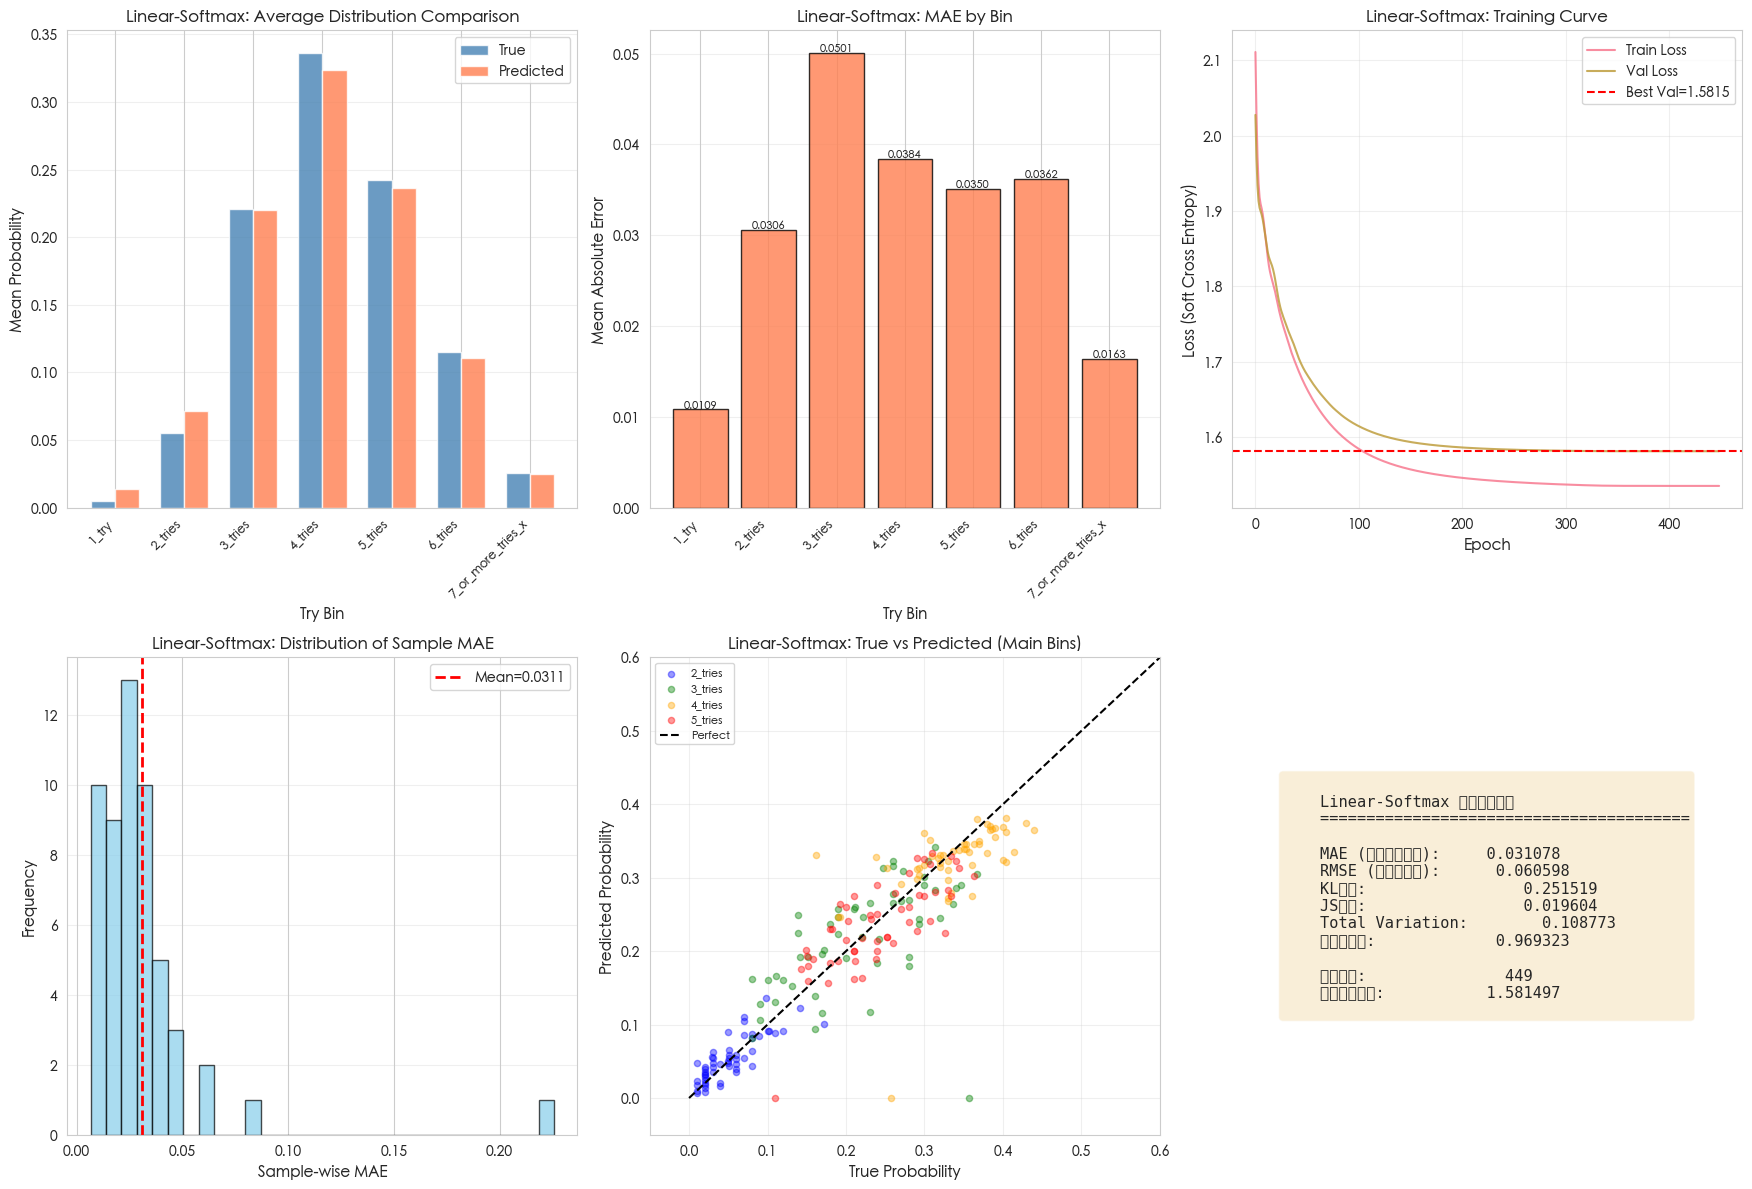


Linear-Softmax 模型评估结果:
  mae: 0.031078


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [ ]:
# 训练 Linear-Softmax 模型
linear_results = train_and_evaluate_distribution_model(
    model_type='linear',
    data=data_dict,
    epochs=500,
    lr=0.01,
    patience=30,
    output_dir="linear_softmax_results",
    save_plots=True,
    show_plots=True
)

print("\n" + "="*60)
print("Linear-Softmax 模型评估结果:")
print("="*60)
for metric, value in linear_results['test_metrics'].items():
    # 跳过数组类型的指标，只打印标量
    try:
        if hasattr(value, '__len__') and len(value) > 1:
            continue  # 跳过数组
        print(f"  {metric}: {value:.6f}")
    except (TypeError, ValueError):
        pass  # 跳过无法格式化的值

### 9.3 MLP-Softmax 模型训练与评估


训练 MLP-Softmax...
设备: cpu, 参数量: 18,183
  Epoch  50: train_loss=1.5335, val_loss=1.5802
  Epoch 100: train_loss=1.5253, val_loss=1.5797
  早停于 Epoch 146

MLP-Softmax (测试集) 分布预测评估结果
  MAE (平均绝对误差):     0.027269
  RMSE (均方根误差):      0.040512
  KL散度:                 0.101076
  JS散度:                 0.012007
  Total Variation:        0.095440
  余弦相似度:             0.980316
  ✓ 保存: mlp_softmax_results/mlp_softmax_results.png


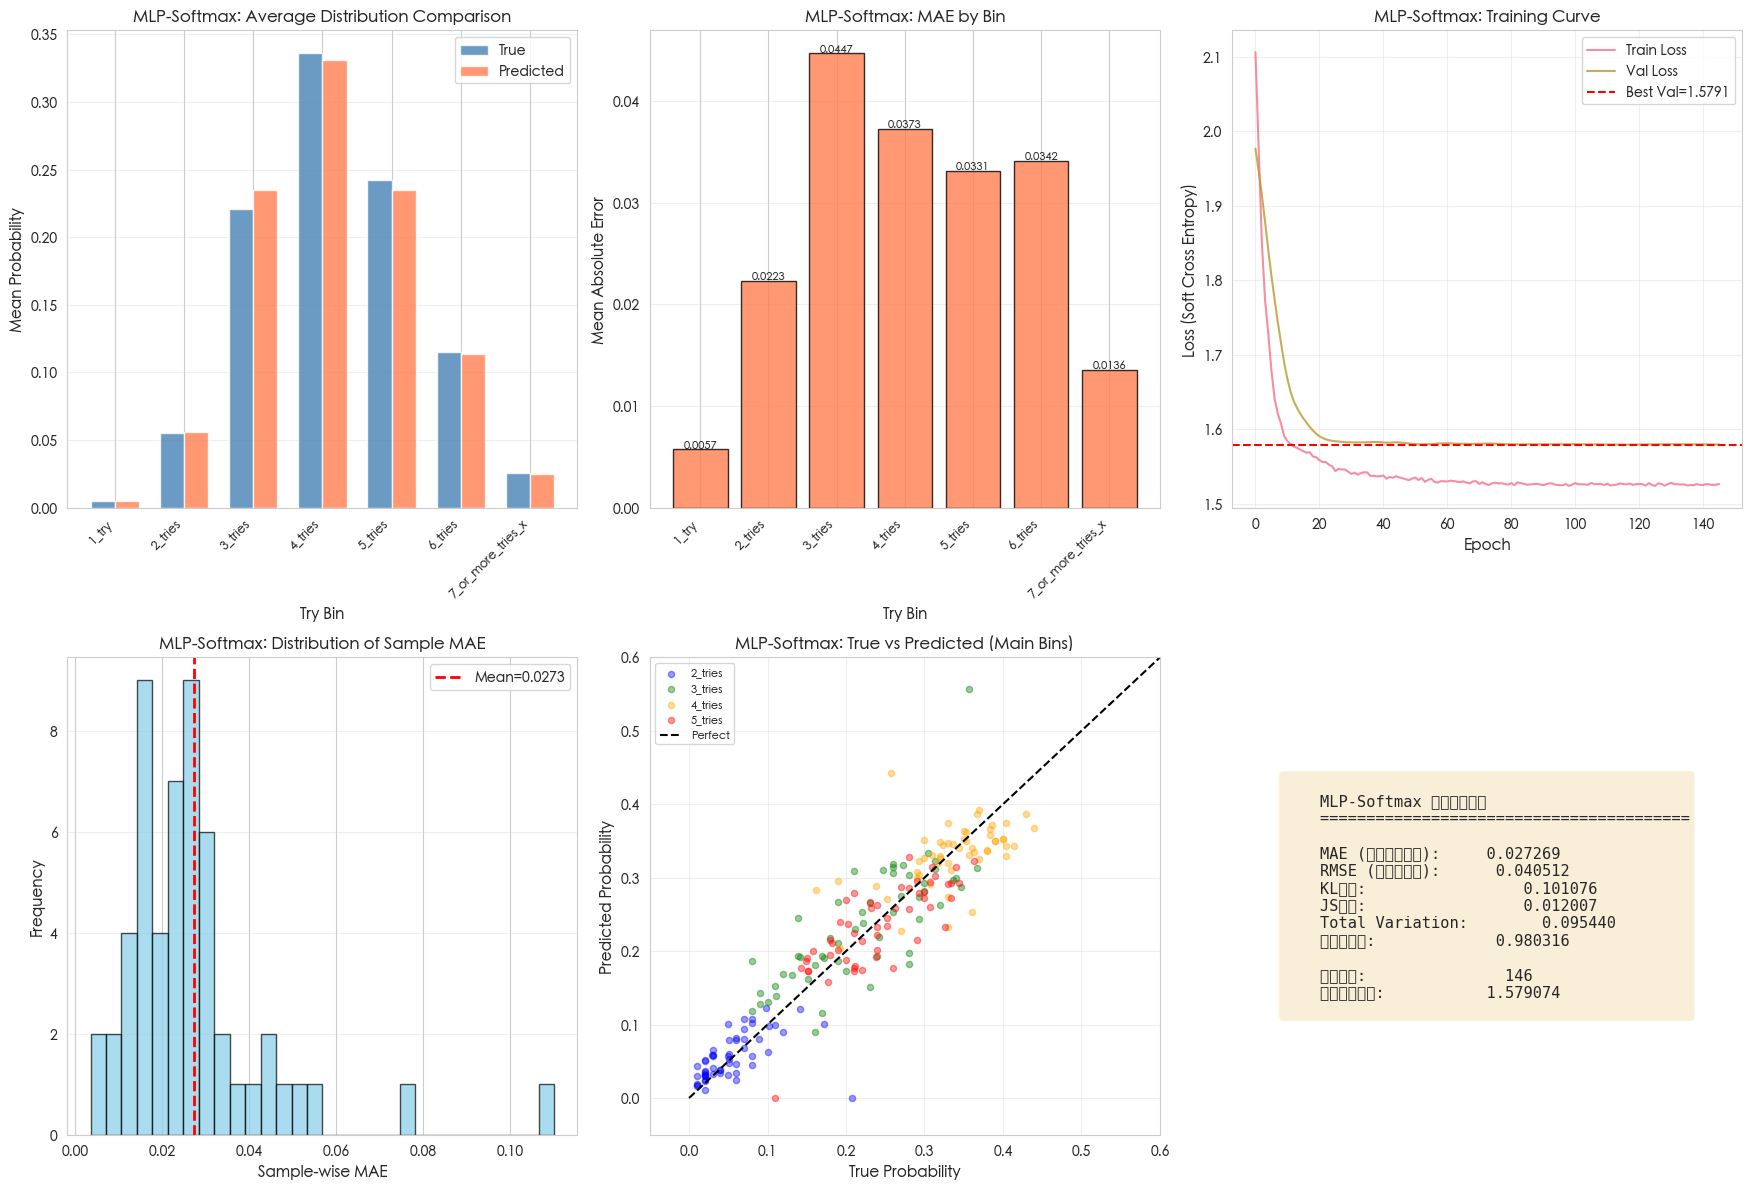


MLP-Softmax 模型评估结果:


NameError: name 'np' is not defined

In [ ]:
# 训练 MLP-Softmax 模型
mlp_results = train_and_evaluate_distribution_model(
    model_type='mlp',
    data=data_dict,
    epochs=500,
    lr=0.01,
    patience=30,
    hidden_dims=[128, 64, 32],
    dropout=0.2,
    output_dir="mlp_softmax_results",
    save_plots=True,
    show_plots=True
)

print("\n" + "="*60)
print("MLP-Softmax 模型评估结果:")
print("="*60)
for metric, value in mlp_results['test_metrics'].items():
    # 跳过数组类型的指标，只打印标量
    try:
        if hasattr(value, '__len__') and len(value) > 1:
            continue  # 跳过数组
        print(f"  {metric}: {value:.6f}")
    except (TypeError, ValueError):
        pass  # 跳过无法格式化的值

### 9.4 Linear-Softmax vs MLP-Softmax 模型对比

  ✓ 保存: distribution_results/models_comparison.png


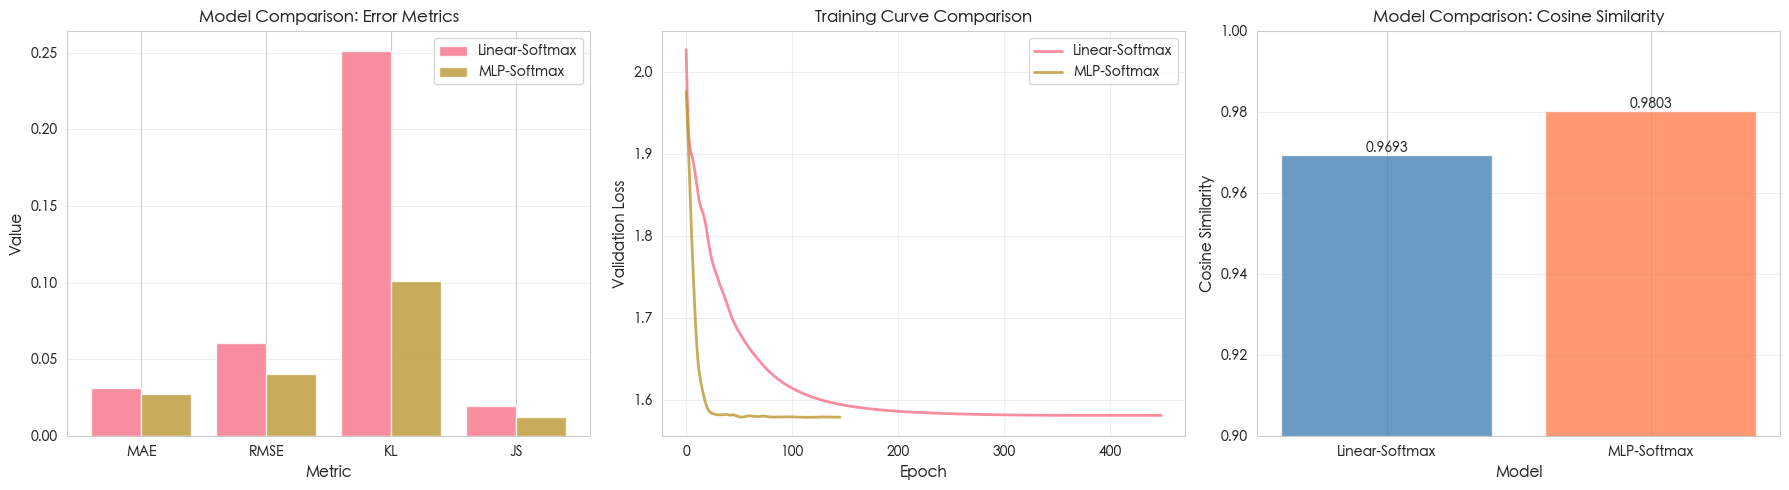


分布预测模型性能对比 (测试集)
         Model      mae  kl_divergence  js_divergence  total_variation  cosine_similarity     rmse
Linear-Softmax 0.031078       0.251519       0.019604         0.108773           0.969323 0.060598
   MLP-Softmax 0.027269       0.101076       0.012007         0.095440           0.980316 0.040512

最优分布预测模型 (基于 MAE): MLP-Softmax
  MAE: 0.027269
  KL Divergence: 0.101076
  Cosine Similarity: 0.980316


In [ ]:
# 对比两种模型的性能
all_dist_results = [linear_results, mlp_results]

# 生成对比图表
compare_distribution_models(
    all_dist_results,
    output_dir="distribution_results",
    save=True,
    show=True
)

# 打印详细对比表格
import pandas as pd
comparison_data = []
for result in all_dist_results:
    row = {'Model': result['model_name']}
    # 只添加非数组的指标
    for key, val in result['test_metrics'].items():
        if not isinstance(val, np.ndarray):
            row[key] = val
    comparison_data.append(row)

comparison_df = pd.DataFrame(comparison_data)
print("\n" + "="*80)
print("分布预测模型性能对比 (测试集)")
print("="*80)
print(comparison_df.to_string(index=False))

# 确定最优模型
best_dist_model = min(all_dist_results, key=lambda x: x['test_metrics']['mae'])
print(f"\n最优分布预测模型 (基于 MAE): {best_dist_model['model_name']}")
print(f"  MAE: {best_dist_model['test_metrics']['mae']:.6f}")
print(f"  KL Divergence: {best_dist_model['test_metrics']['kl_divergence']:.6f}")
print(f"  Cosine Similarity: {best_dist_model['test_metrics']['cosine_similarity']:.6f}")

### 9.5 生成分布预测报告

In [ ]:
# 生成综合报告
generate_distribution_report(
    all_dist_results,
    data=data_dict,
    output_path="distribution_results/comparison_report.txt"
)

print("分布预测模型对比报告已保存至 distribution_results/comparison_report.txt")


报告已保存到 distribution_results/comparison_report.txt
分布预测模型对比报告已保存至 distribution_results/comparison_report.txt
